<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [74]:
# import the pacakges
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

from scipy import stats

### Step 1: Load and Explore the Data

In [75]:
# Load the data from the uploaded files
batting = pd.read_csv("batting.csv")
pitching = pd.read_csv("pitching.csv")
player = pd.read_csv("player.csv")
salary = pd.read_csv("salary.csv")

# Display the first few rows of each dataframe to understand their structure
print("Batting DataFrame:")
print(batting.head())

print("\nPitching DataFrame:")
print(pitching.head())

print("\nPlayer DataFrame:")
print(player.head())

print("\nSalary DataFrame:")
print(salary.head())

# Print the column names of each dataframe
print("Batting DataFrame Columns:")
print(batting.columns)

print("\nPitching DataFrame Columns:")
print(pitching.columns)

print("\nPlayer DataFrame Columns:")
print(player.columns)

print("\nSalary DataFrame Columns:")
print(salary.columns)

Batting DataFrame:
   player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0  ...   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1  ...  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2  ...  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3  ...  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4  ...  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]

Pitching DataFrame:
   player_id  year  stint team_id league_id   w   l   g  gs  cg  ...  ibb  wp  \
0  bechtge01  1871      1  

### Step 2: Data Wrangling on multiple tables 

In [76]:
# Filter relevant columns
batting_subset = batting[['player_id', 'year', 'team_id', 'ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb', 'so']]
pitching_subset = pitching[['player_id', 'year', 'w', 'l', 'era', 'so', 'bb', 'ipouts']]
player_subset = player[['player_id', 'birth_year', 'weight', 'height']]
salary_subset = salary[['player_id', 'year', 'team_id', 'salary']]

In [77]:
# Merge tables on 'player_id' 
#merge salary with player, inner join to only keep records of players with salary.
final_data = pd.merge(salary_subset, player, on='player_id', how='left').drop_duplicates()
final_data = pd.merge(final_data, batting_subset, on='player_id', how='inner').drop_duplicates()
final_data = pd.merge(final_data, pitching_subset, on='player_id', how='inner').drop_duplicates()

# Display the merged data columns to ensure all required columns are present
print("Merged Data Columns:", final_data.columns)

Merged Data Columns: Index(['player_id', 'year_x', 'team_id_x', 'salary', 'birth_year',
       'birth_month', 'birth_day', 'birth_country', 'birth_state',
       'birth_city', 'death_year', 'death_month', 'death_day', 'death_country',
       'death_state', 'death_city', 'name_first', 'name_last', 'name_given',
       'weight', 'height', 'bats', 'throws', 'debut', 'final_game', 'retro_id',
       'bbref_id', 'year_y', 'team_id_y', 'ab', 'r', 'h', 'hr', 'rbi', 'sb',
       'bb_x', 'so_x', 'year', 'w', 'l', 'era', 'so_y', 'bb_y', 'ipouts'],
      dtype='object')


In [78]:
#convert to datetime
final_data['debut'] = pd.to_datetime(final_data['debut'], errors='coerce')
final_data['final_game'] = pd.to_datetime(final_data['final_game'], errors='coerce')

# Calculate age assuming the year is for the season year
final_data['age'] = final_data['year_x'] - final_data['birth_year']

# Display the head of the final merged dataframe with new features
print("Final Merged Data with New Features:")
print(final_data[['player_id', 'year_x', 'team_id_x', 'salary', 'age']].head())

Final Merged Data with New Features:
   player_id  year_x team_id_x  salary   age
0  barkele01    1985       ATL  870000  30.0
1  barkele01    1985       ATL  870000  30.0
2  barkele01    1985       ATL  870000  30.0
3  barkele01    1985       ATL  870000  30.0
4  barkele01    1985       ATL  870000  30.0


In [79]:
print("Head of the Final Merged Data:")
final_data.head()

Head of the Final Merged Data:


,player_id,year_x,team_id_x,salary,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,...,bb_x,so_x,year,w,l,era,so_y,bb_y,ipouts,age
0,barkele01,1985,ATL,870000,1955.0,7.0,27.0,USA,KY,Fort Knox,...,NaN,NaN,1976,1,0,2.40,7,6,45.0,30.0
1,barkele01,1985,ATL,870000,1955.0,7.0,27.0,USA,KY,Fort Knox,...,NaN,NaN,1977,4,1,2.66,51,24,142.0,30.0
2,barkele01,1985,ATL,870000,1955.0,7.0,27.0,USA,KY,Fort Knox,...,NaN,NaN,1978,1,5,4.82,33,29,157.0,30.0
3,barkele01,1985,ATL,870000,1955.0,7.0,27.0,USA,KY,Fort Knox,...,NaN,NaN,1979,6,6,4.92,93,70,412.0,30.0
4,barkele01,1985,ATL,870000,1955.0,7.0,27.0,USA,KY,Fort Knox,...,NaN,NaN,1980,19,12,4.17,187,92,739.0,30.0


In [80]:
print("Info about the Final Merged Data:")
final_data.info()

Info about the Final Merged Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851017 entries, 0 to 1851016
Data columns (total 45 columns):
 #   Column         Dtype         
---  ------         -----         
 0   player_id      object        
 1   year_x         int64         
 2   team_id_x      object        
 3   salary         int64         
 4   birth_year     float64       
 5   birth_month    float64       
 6   birth_day      float64       
 7   birth_country  object        
 8   birth_state    object        
 9   birth_city     object        
 10  death_year     float64       
 11  death_month    float64       
 12  death_day      float64       
 13  death_country  object        
 14  death_state    object        
 15  death_city     object        
 16  name_first     object        
 17  name_last      object        
 18  name_given     object        
 19  weight         float64       
 20  height         float64       
 21  bats           object        
 22  throws  

In [81]:
print("Description of the Final Merged Data:")
final_data.describe()

Description of the Final Merged Data:


,year_x,salary,birth_year,birth_month,birth_day,death_year,death_month,death_day,weight,height,...,bb_x,so_x,year,w,l,era,so_y,bb_y,ipouts,age
count,1.851017e+06,1.851017e+06,1.851017e+06,1.851017e+06,1.851017e+06,30913.000000,30913.000000,30913.000000,1.851017e+06,1.851017e+06,...,1.501994e+06,1.501994e+06,1.851017e+06,1.851017e+06,1.851017e+06,1.850175e+06,1.851017e+06,1.851017e+06,1.851008e+06,1.851017e+06
mean,1.998960e+03,2.485831e+06,1.967796e+03,6.941583e+00,1.565177e+01,2007.624624,7.319057,18.416039,2.012746e+02,7.441688e+01,...,9.827509e-01,6.071157e+00,1.998240e+03,5.772192e+00,5.211322e+00,4.506715e+00,7.005570e+01,3.342914e+01,2.885464e+02,3.116339e+01
min,1.985000e+03,0.000000e+00,1.925000e+03,1.000000e+00,1.000000e+00,1989.000000,1.000000,1.000000,1.500000e+02,6.600000e+01,...,0.000000e+00,0.000000e+00,1.954000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
25%,1.993000e+03,3.653000e+05,1.962000e+03,4.000000e+00,8.000000e+00,2006.000000,6.000000,9.000000,1.850000e+02,7.300000e+01,...,0.000000e+00,0.000000e+00,1.992000e+03,1.000000e+00,2.000000e+00,3.180000e+00,2.600000e+01,1.400000e+01,1.100000e+02,2.700000e+01
50%,1.999000e+03,1.000000e+06,1.968000e+03,7.000000e+00,1.600000e+01,2008.000000,7.000000,23.000000,2.000000e+02,7.400000e+01,...,0.000000e+00,1.000000e+00,1.999000e+03,4.000000e+00,4.000000e+00,4.010000e+00,5.600000e+01,2.700000e+01,2.180000e+02,3.100000e+01
75%,2.005000e+03,3.250000e+06,1.974000e+03,1.000000e+01,2.300000e+01,2012.000000,10.000000,24.000000,2.150000e+02,7.600000e+01,...,1.000000e+00,9.000000e+00,2.005000e+03,9.000000e+00,8.000000e+00,5.060000e+00,1.010000e+02,4.900000e+01,4.710000e+02,3.500000e+01
max,2.015000e+03,3.257100e+07,1.993000e+03,1.200000e+01,3.100000e+01,2015.000000,12.000000,31.000000,3.050000e+02,8.300000e+01,...,1.280000e+02,2.220000e+02,2.015000e+03,2.700000e+01,2.100000e+01,1.620000e+02,3.830000e+02,2.040000e+02,1.039000e+03,8.200000e+01
std,8.030377e+00,3.427969e+06,8.864272e+00,3.453723e+00,8.884445e+00,5.986198,2.753563,8.773147,2.259876e+01,2.130984e+00,...,4.432292e+00,1.067329e+01,9.211782e+00,5.375266e+00,4.203556e+00,3.599863e+00,5.755015e+01,2.540847e+01,2.219214e+02,5.050300e+00


In [82]:
# Check for missing values
print("\nMissing values in the Final Merged Data:")
final_data.isnull().sum()


Missing values in the Final Merged Data:


player_id              0
year_x                 0
team_id_x              0
salary                 0
birth_year             0
birth_month            0
birth_day              0
birth_country          0
birth_state        79859
birth_city           772
death_year       1820104
death_month      1820104
death_day        1820104
death_country    1820104
death_state      1820104
death_city       1820104
name_first             0
name_last              0
name_given             0
weight                 0
height                 0
bats                   0
throws                 0
debut                  0
final_game             0
retro_id               0
bbref_id               0
year_y                 0
team_id_y              0
ab                349023
r                 349023
h                 349023
hr                349023
rbi               349023
sb                349023
bb_x              349023
so_x              349023
year                   0
w                      0
l                      0


In [83]:
# List of columns to drop
columns_to_drop = [
    'birth_month', 'birth_day', 'birth_state', 'birth_city', 'death_year', 
    'death_month', 'death_day', 'death_country', 'death_state', 'death_city', 
    'retro_id', 'bbref_id', 'year_y', 'team_id_y'
]

# Drop the irrelevant columns
final_data_cleaned = final_data.drop(columns=columns_to_drop)

# Display the remaining columns
print("Columns after dropping irrelevant ones:")
print(final_data_cleaned.columns)

# Display the missing values in the cleaned data
print("Missing values in the cleaned data:")
print(final_data_cleaned.isnull().sum())

Columns after dropping irrelevant ones:
Index(['player_id', 'year_x', 'team_id_x', 'salary', 'birth_year',
       'birth_country', 'name_first', 'name_last', 'name_given', 'weight',
       'height', 'bats', 'throws', 'debut', 'final_game', 'ab', 'r', 'h', 'hr',
       'rbi', 'sb', 'bb_x', 'so_x', 'year', 'w', 'l', 'era', 'so_y', 'bb_y',
       'ipouts', 'age'],
      dtype='object')
Missing values in the cleaned data:
player_id             0
year_x                0
team_id_x             0
salary                0
birth_year            0
birth_country         0
name_first            0
name_last             0
name_given            0
weight                0
height                0
bats                  0
throws                0
debut                 0
final_game            0
ab               349023
r                349023
h                349023
hr               349023
rbi              349023
sb               349023
bb_x             349023
so_x             349023
year                  0
w 

In [84]:
print(final_data_cleaned[['year_x', 'year']].head())

   year_x  year
0    1985  1976
1    1985  1977
2    1985  1978
3    1985  1979
4    1985  1980


In [85]:
#find categorical columns
cat_cols = [c for c in final_data_cleaned.columns if final_data_cleaned[c].dtypes=='O']
final_data_cleaned[cat_cols].isnull().mean().sort_values()

player_id        0.0
team_id_x        0.0
birth_country    0.0
name_first       0.0
name_last        0.0
name_given       0.0
bats             0.0
throws           0.0
dtype: float64

In [86]:
print("Shape of the final data")
final_data_cleaned.shape

Shape of the final data


(1851017, 31)

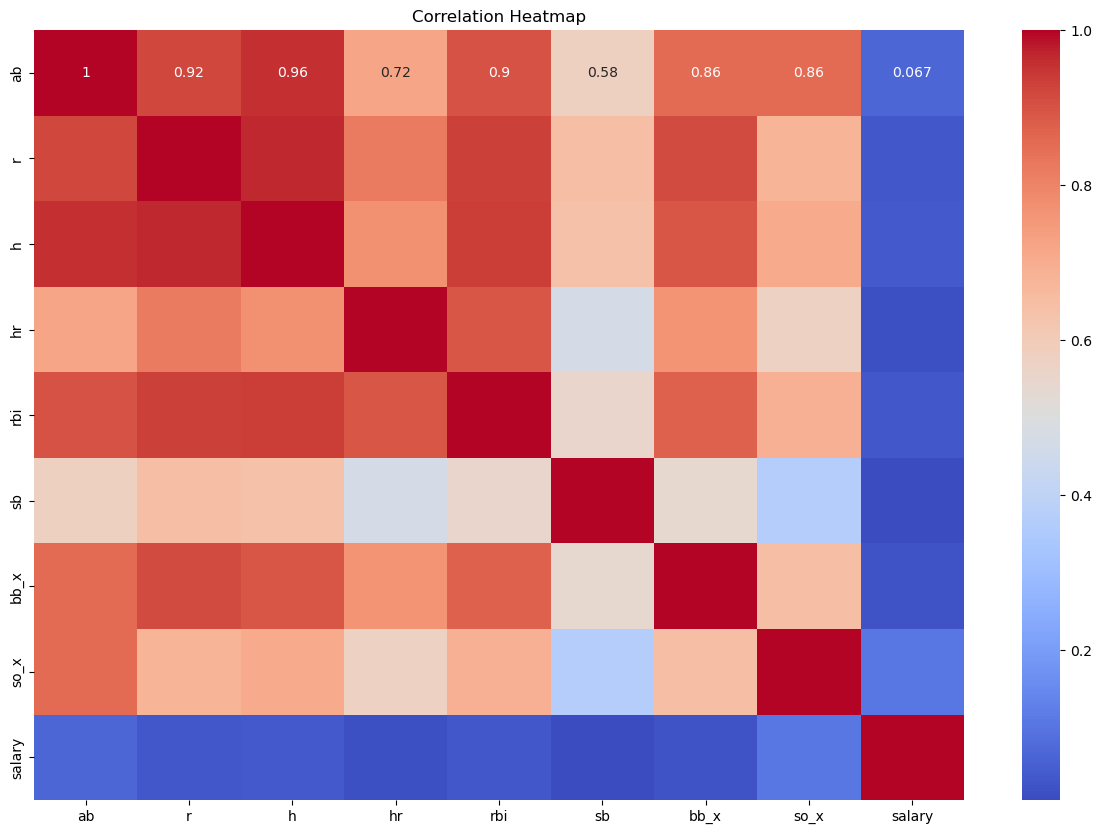

In [87]:
# Heatmap for correlations
plt.figure(figsize=(15, 10))
corr = final_data_cleaned[['ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb_x', 'so_x', 'salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

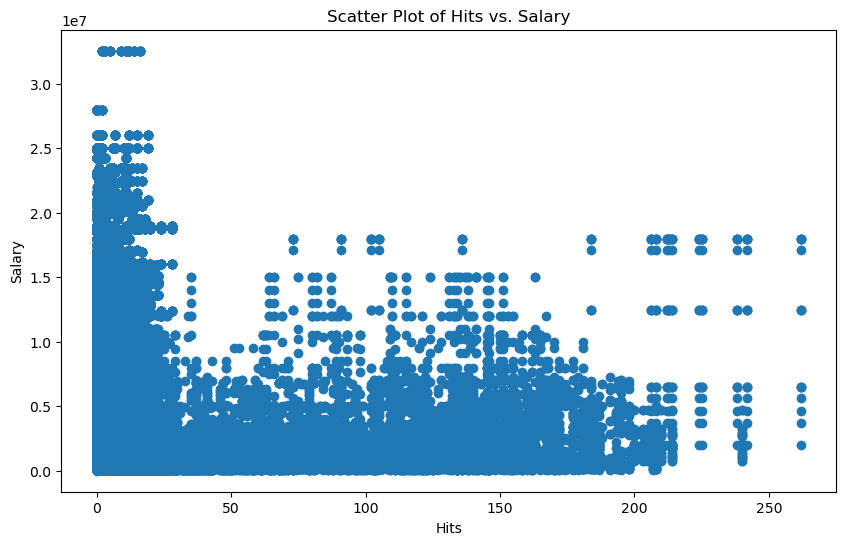

In [88]:
# This scatter plot was made post merging of table, hence the final_data
# Scatter plot to explore relationships
plt.figure(figsize=(10, 6))
plt.scatter(final_data_cleaned['h'], final_data_cleaned['salary'])
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.title('Scatter Plot of Hits vs. Salary')
plt.show()

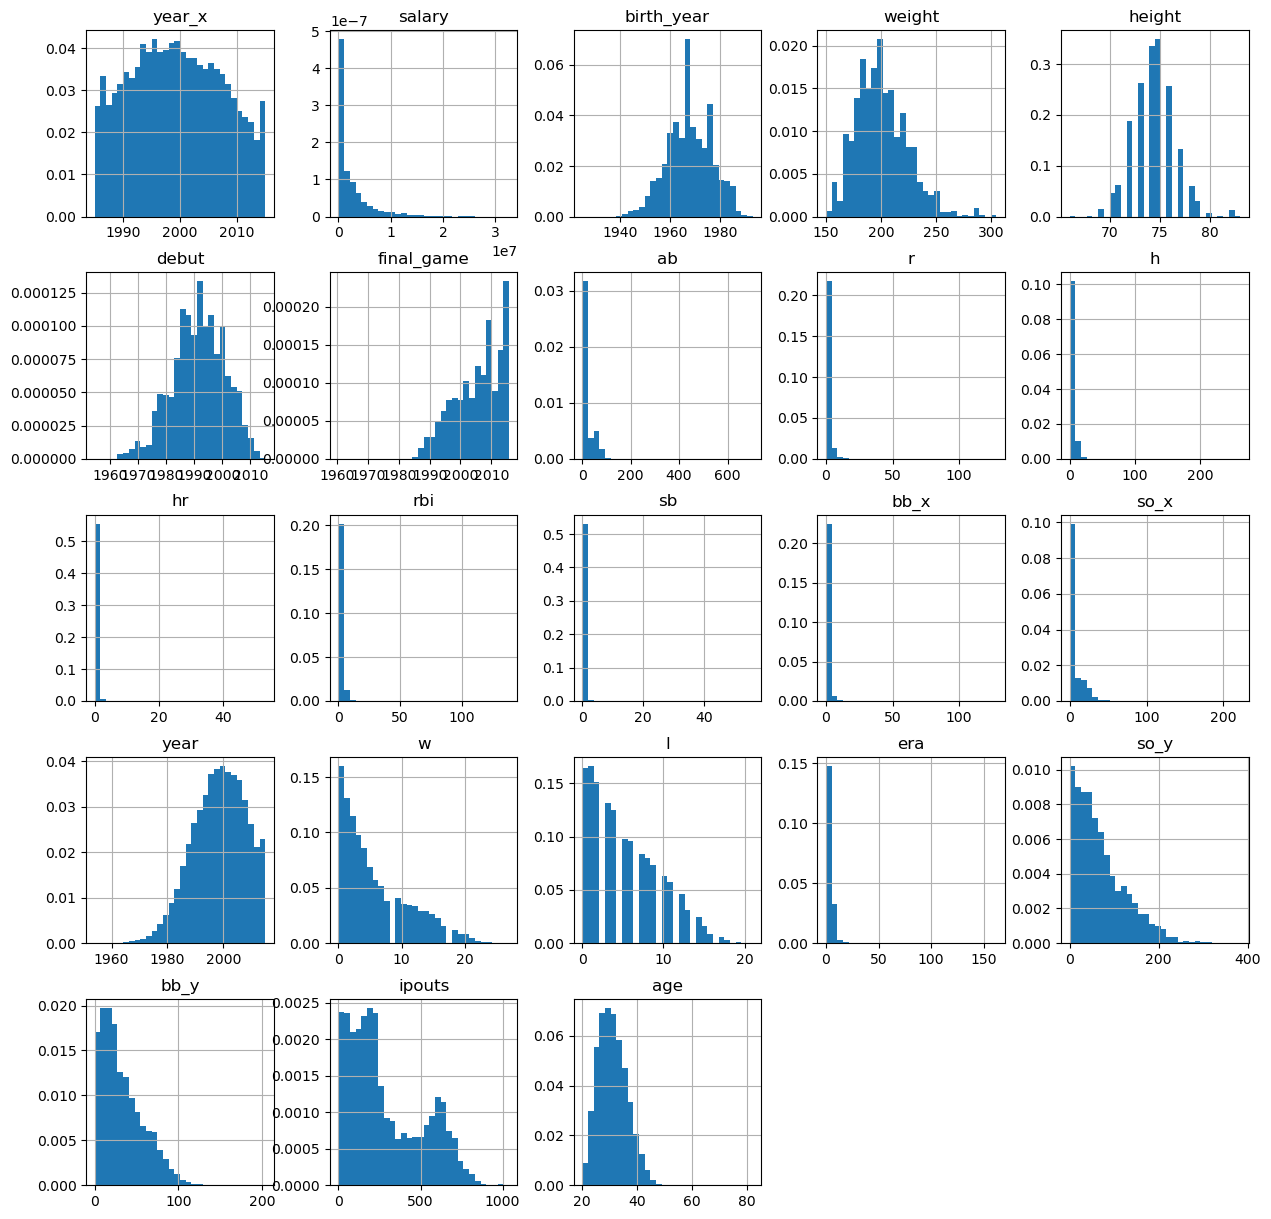

In [89]:
final_data_cleaned.hist(bins=30, figsize=(15,15), density=True)
plt.show()

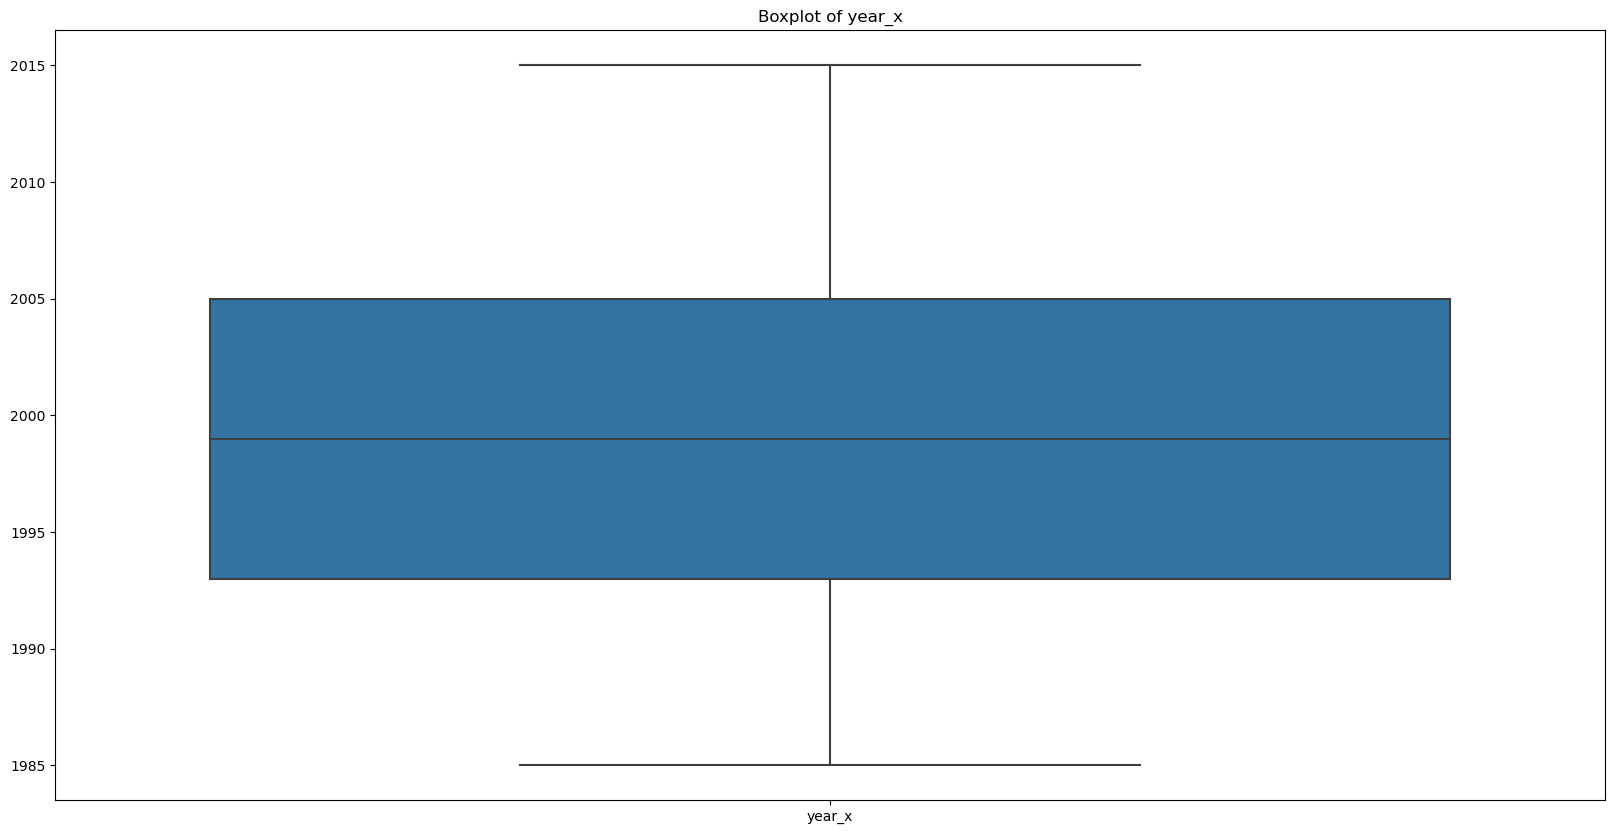

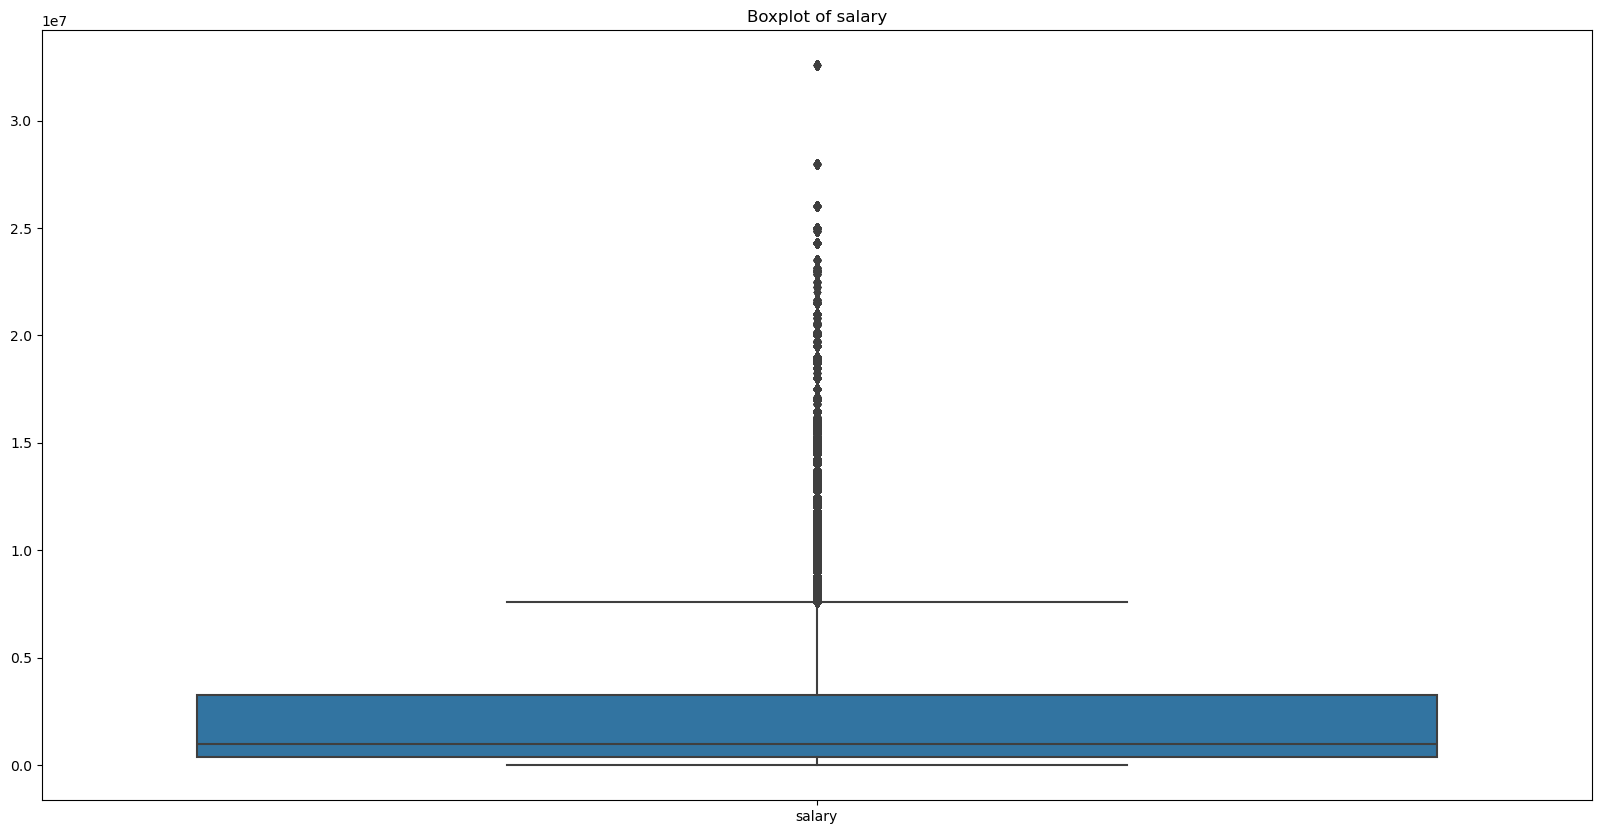

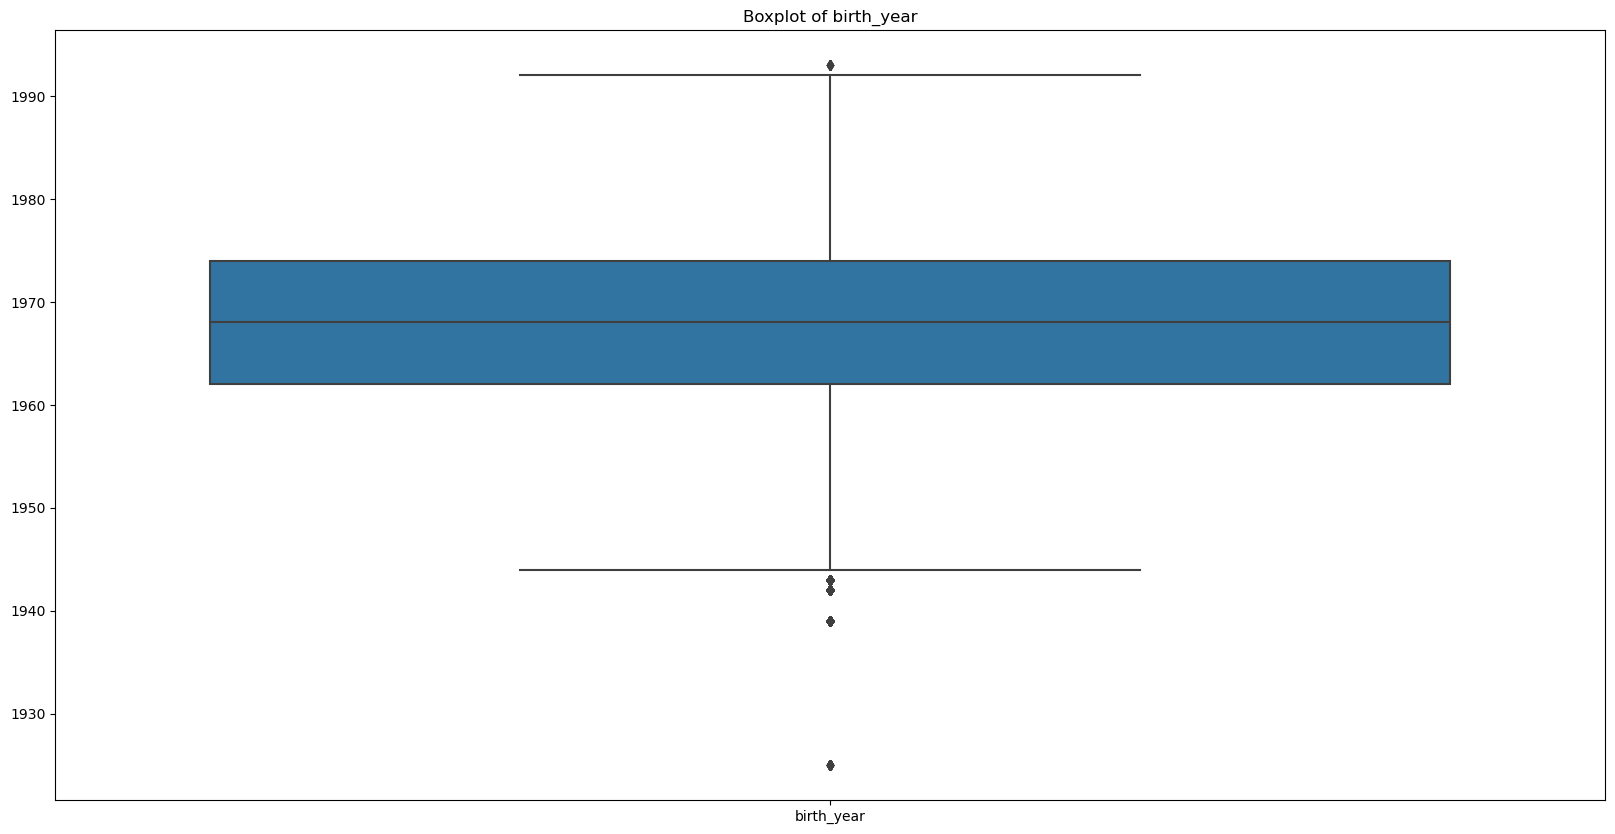

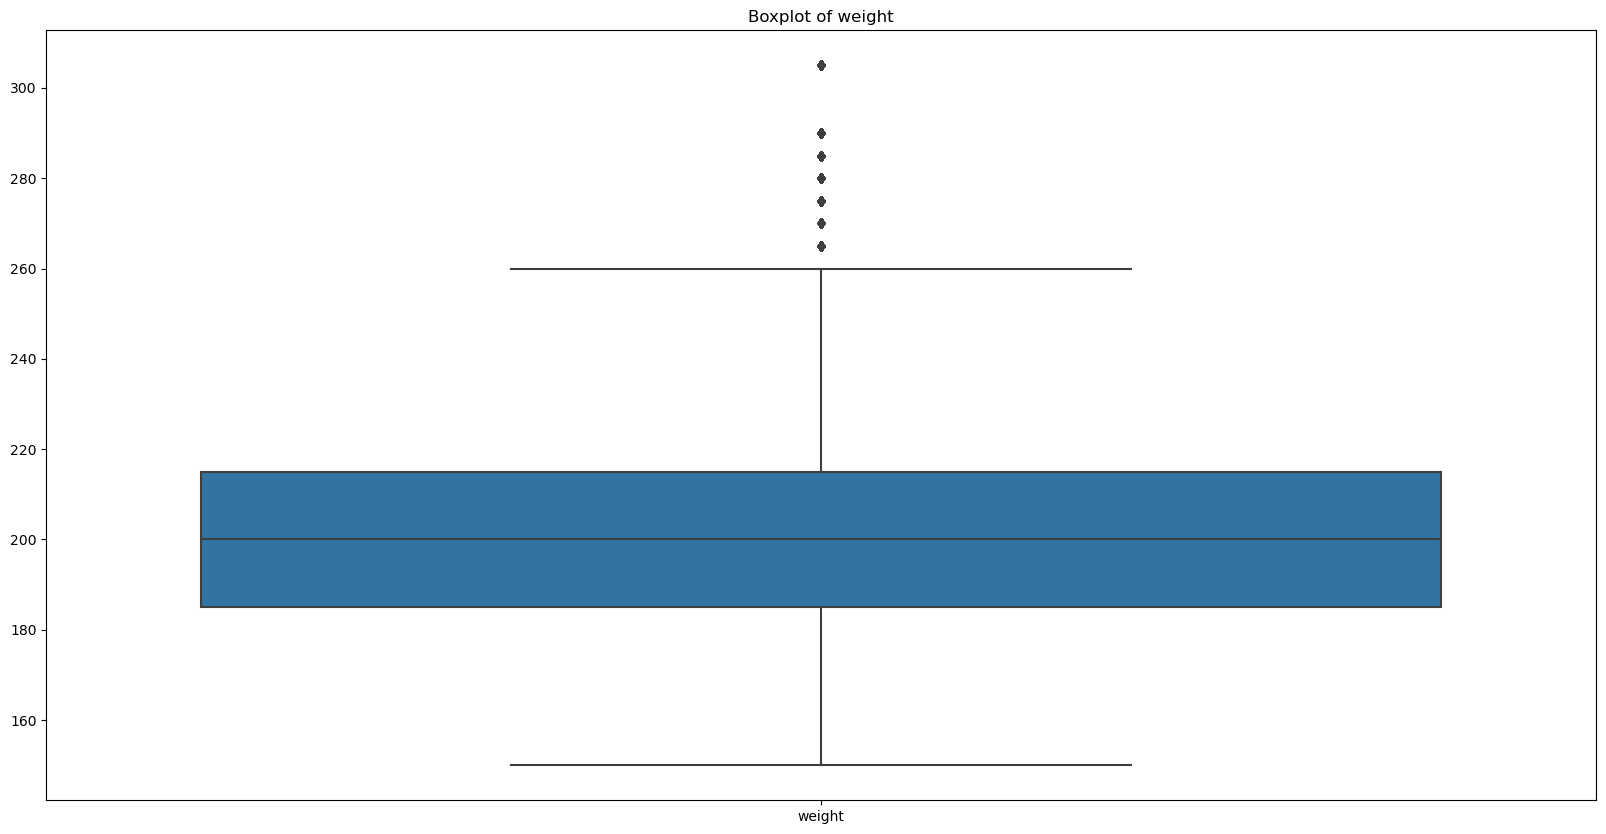

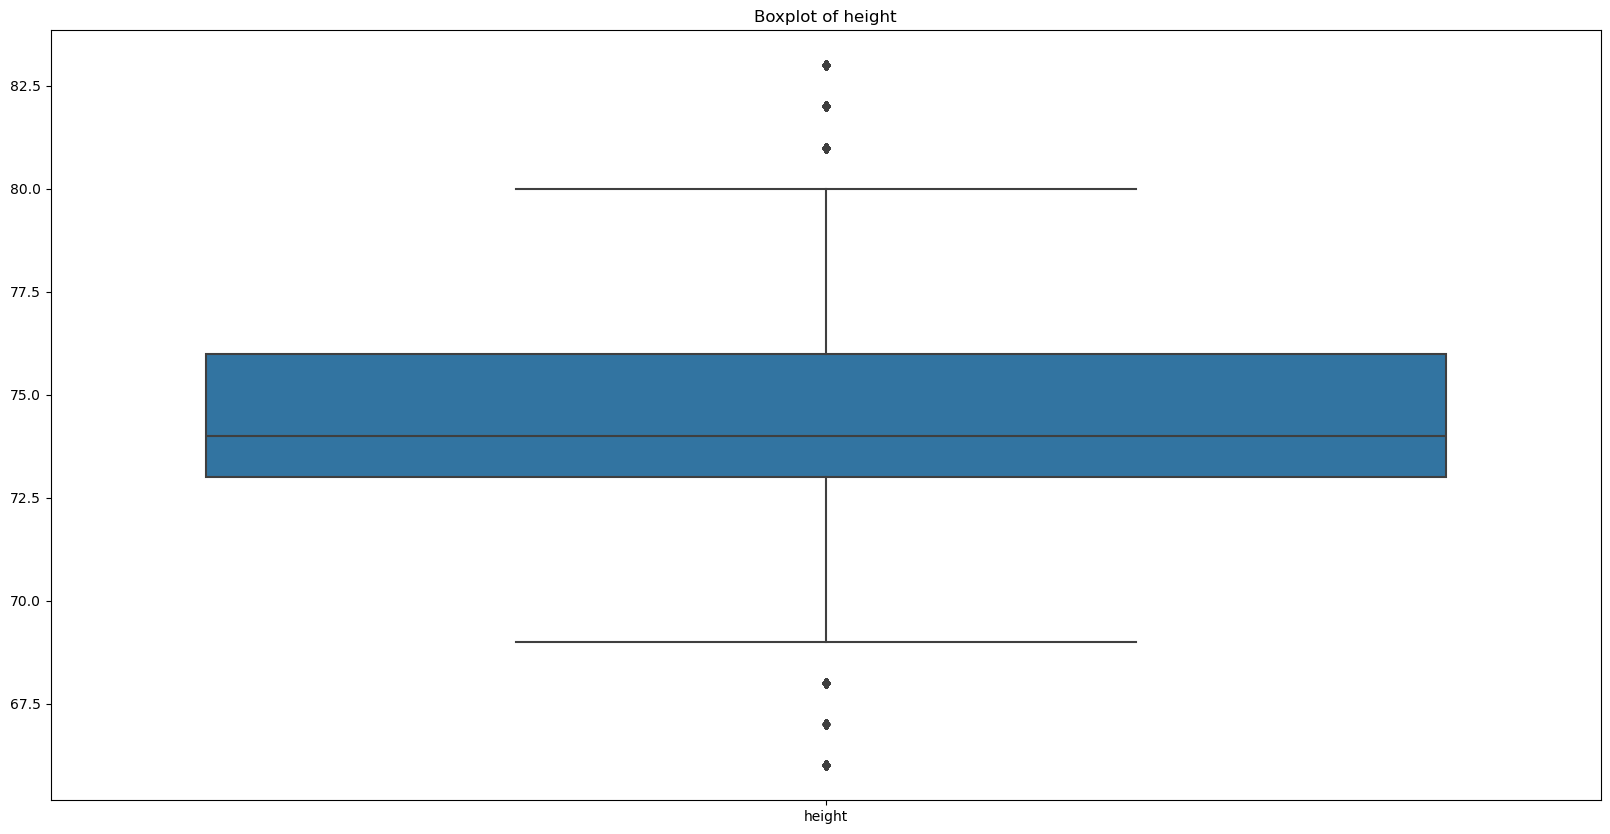

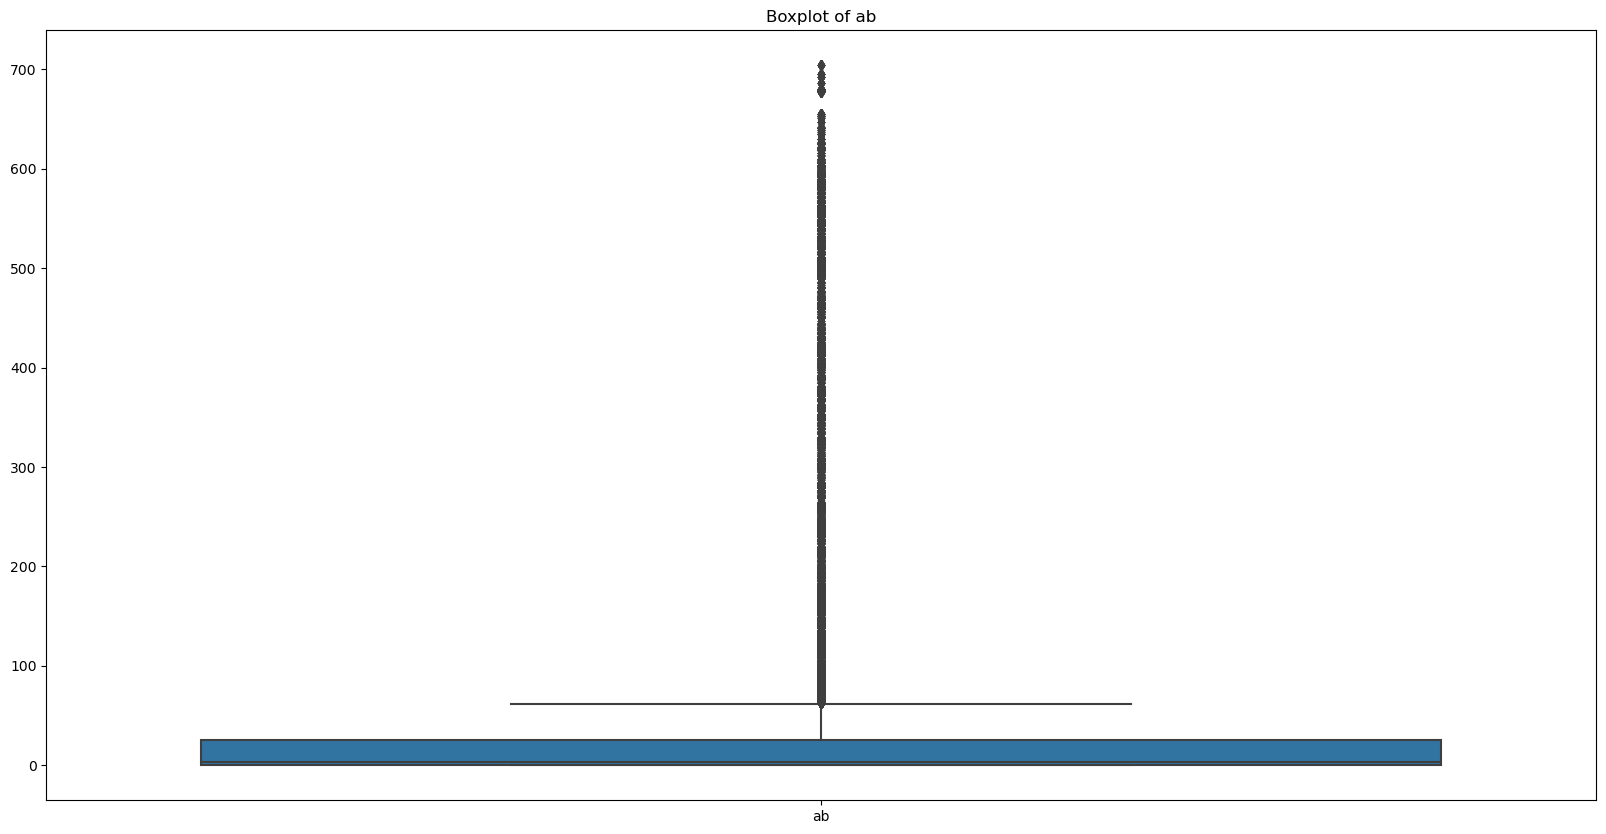

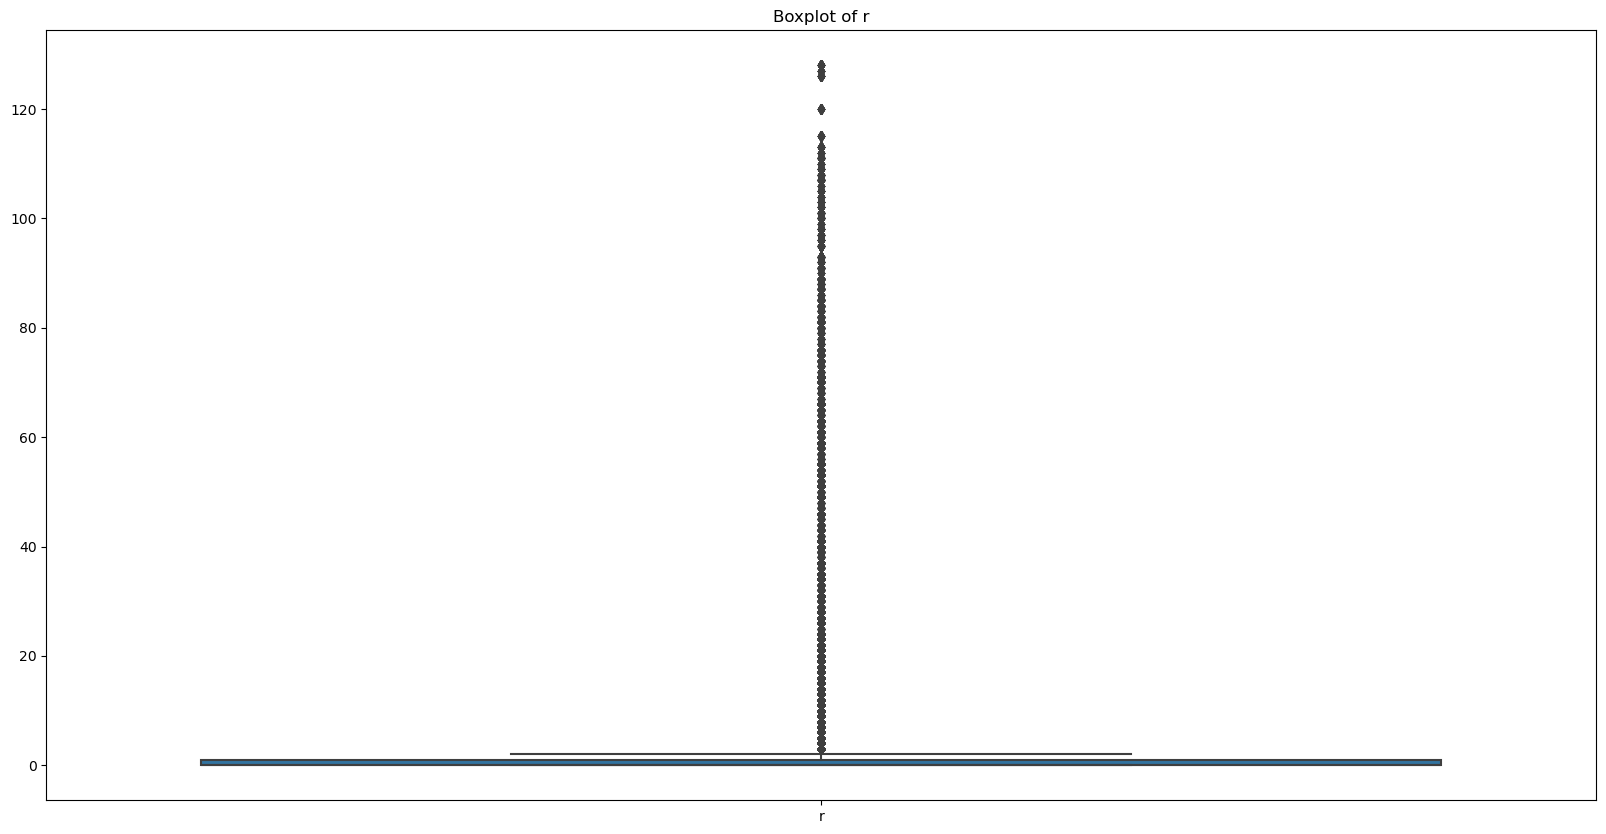

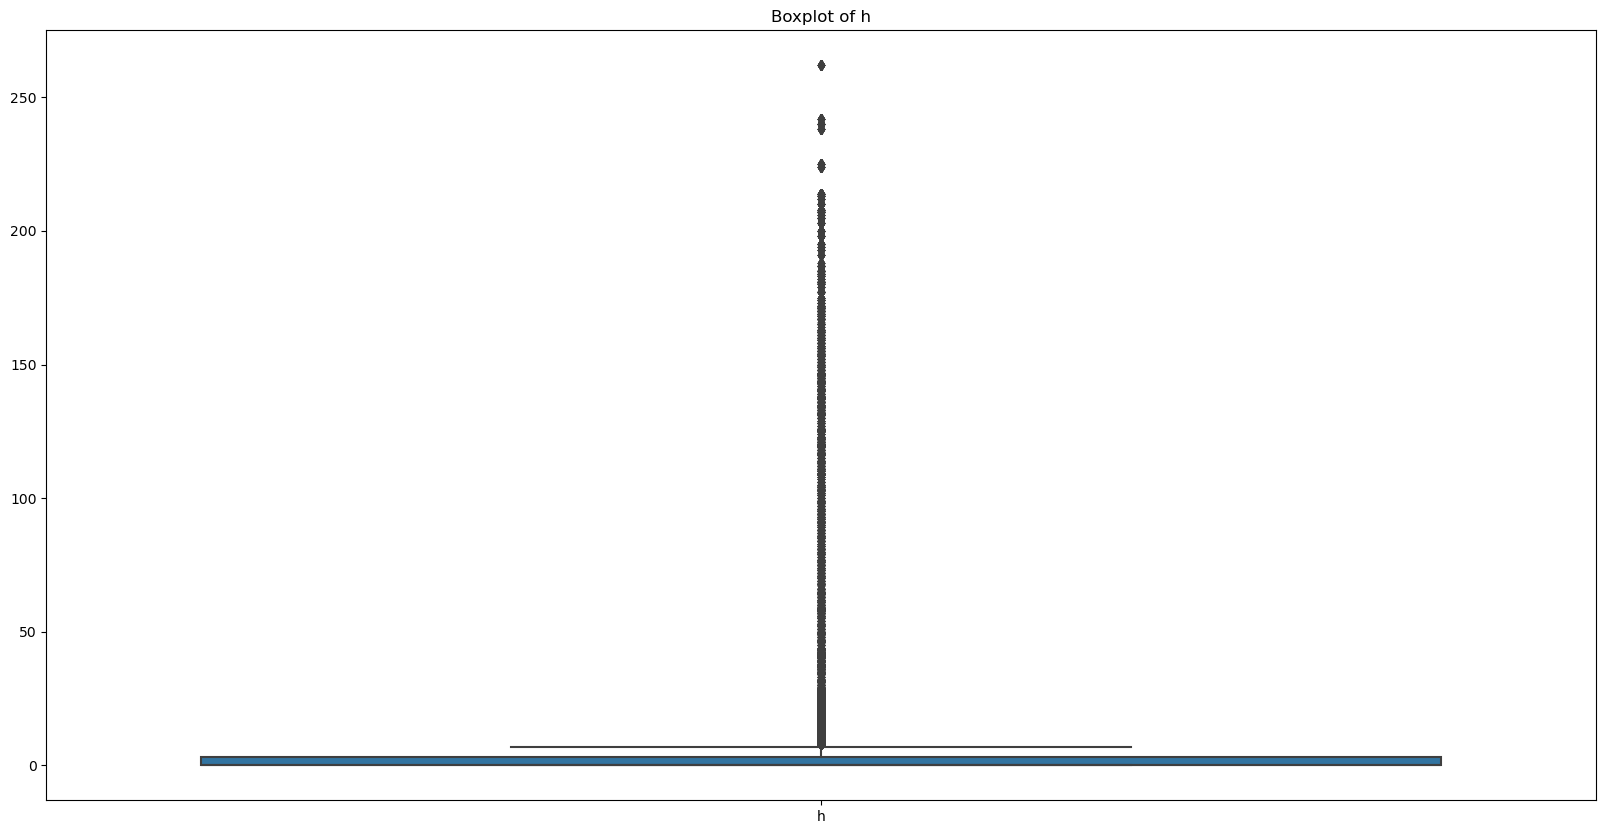

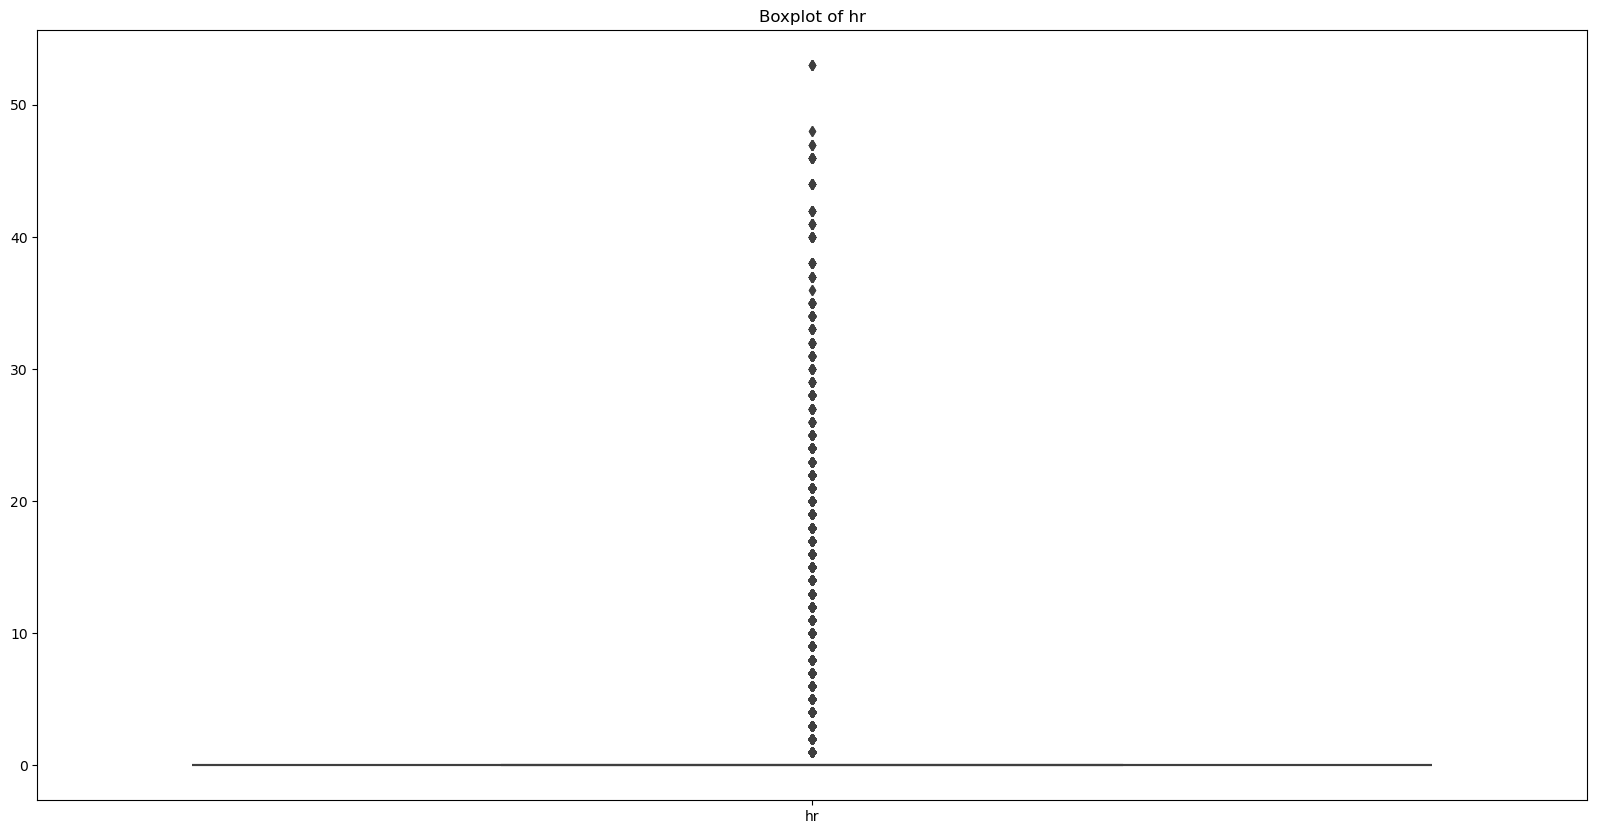

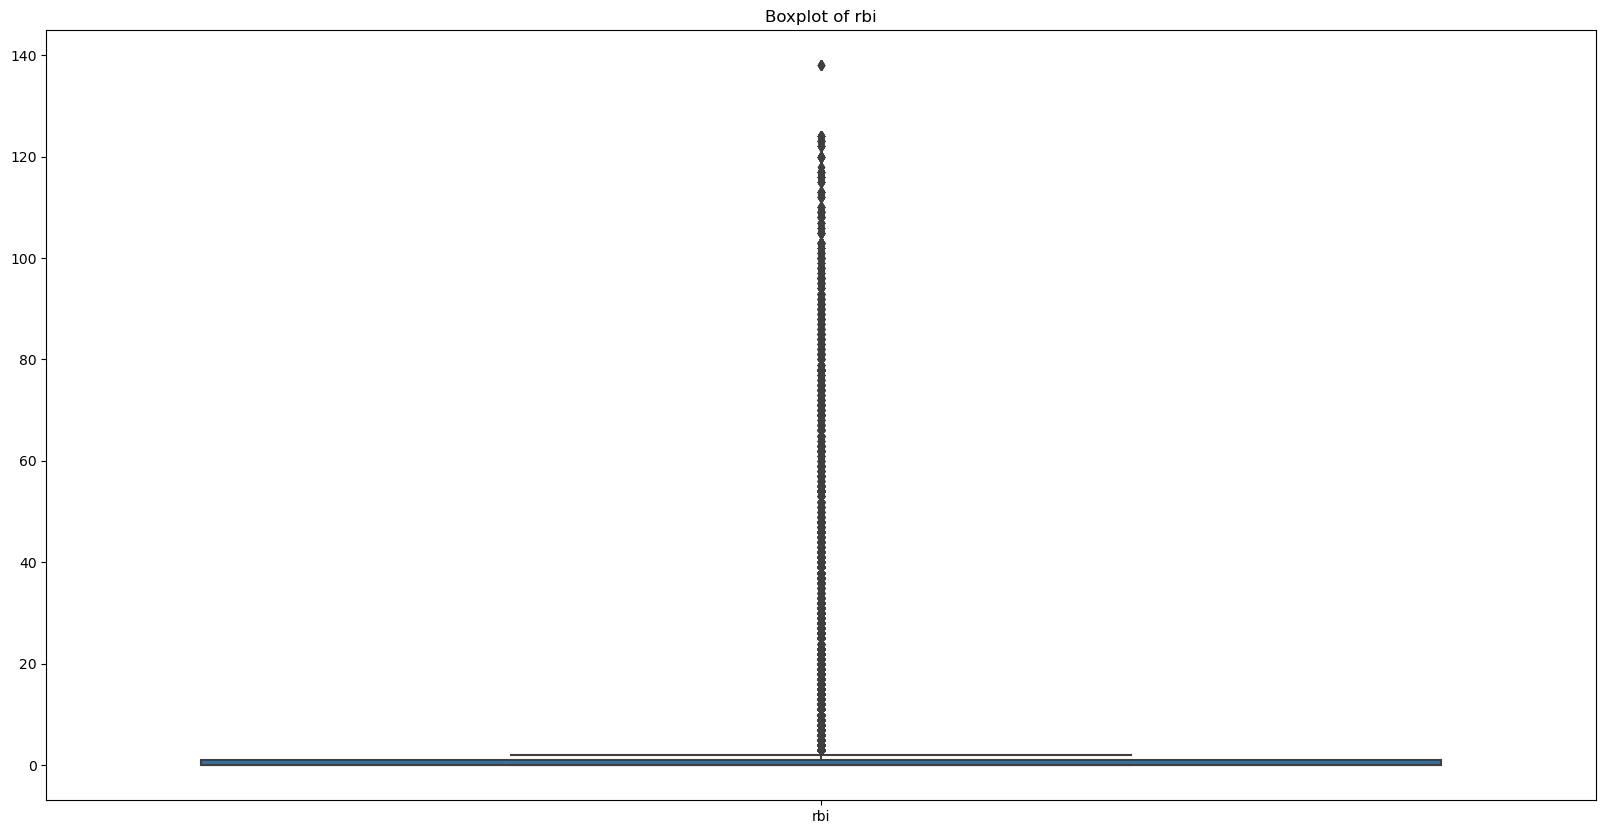

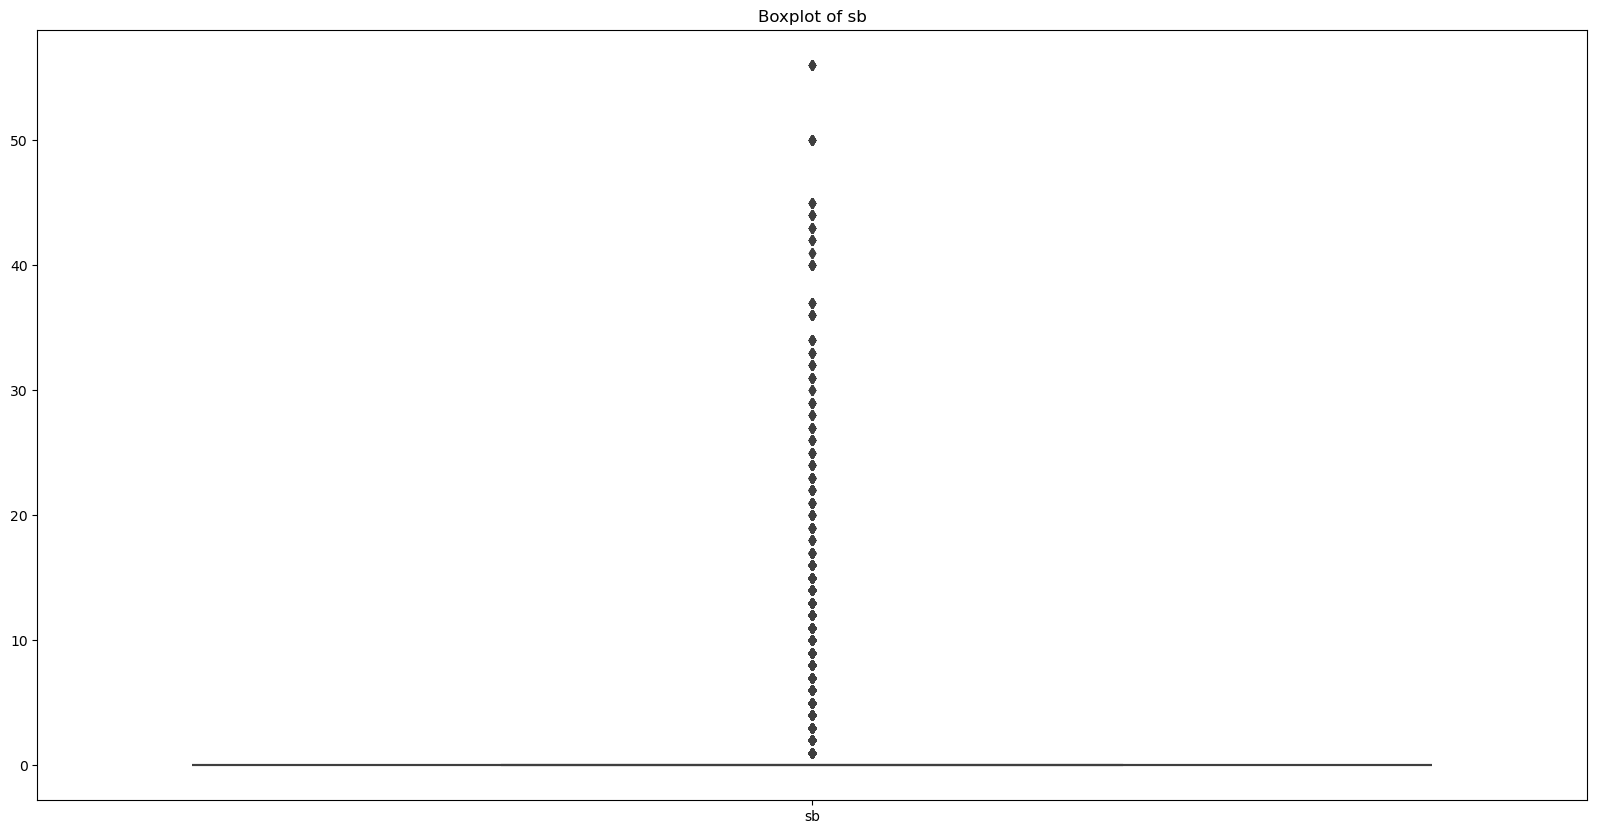

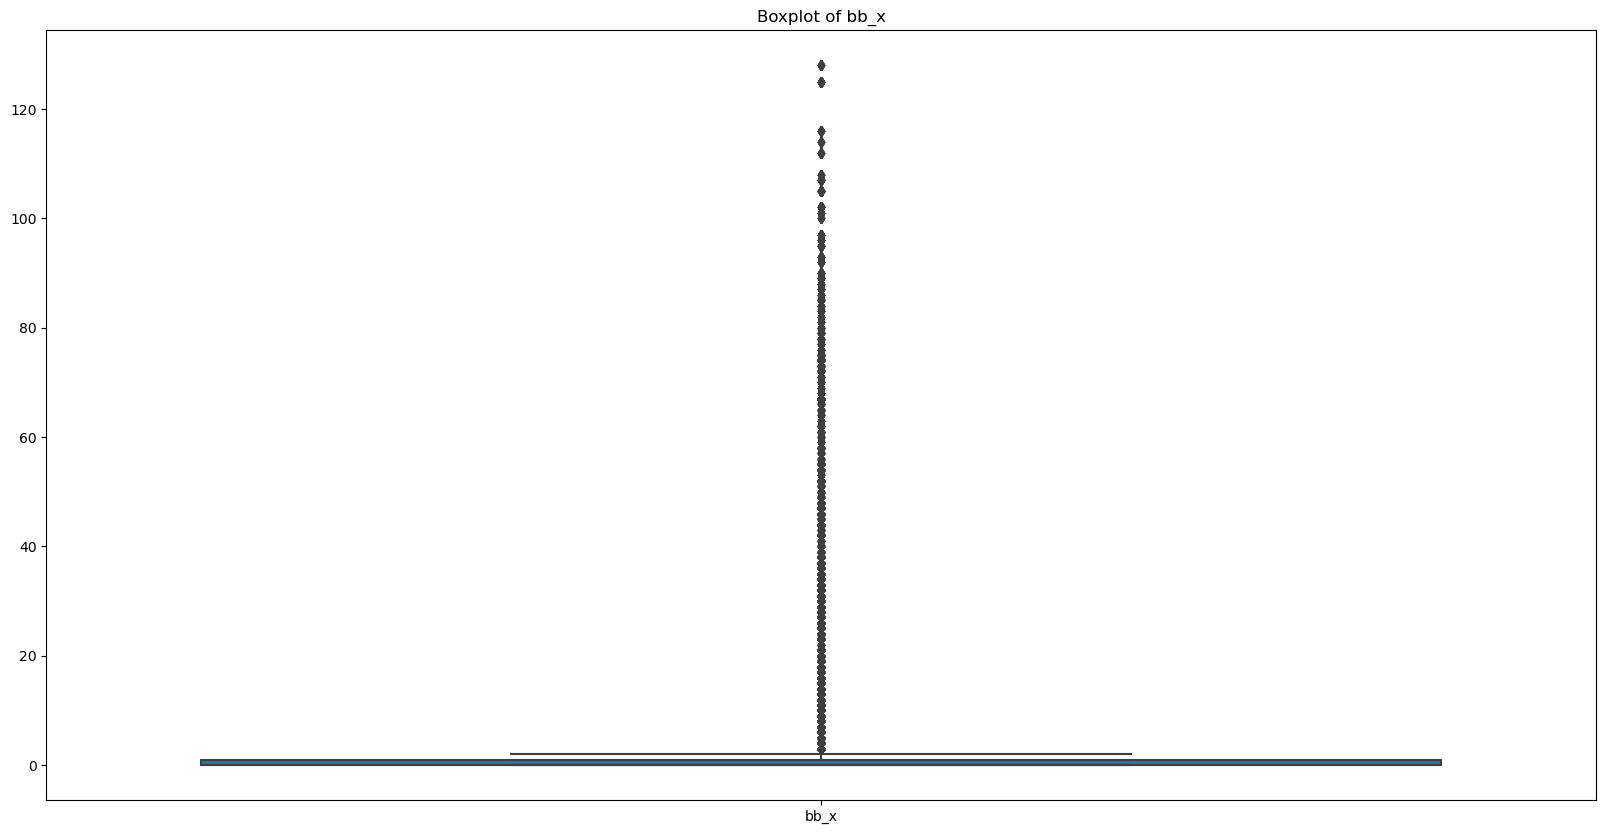

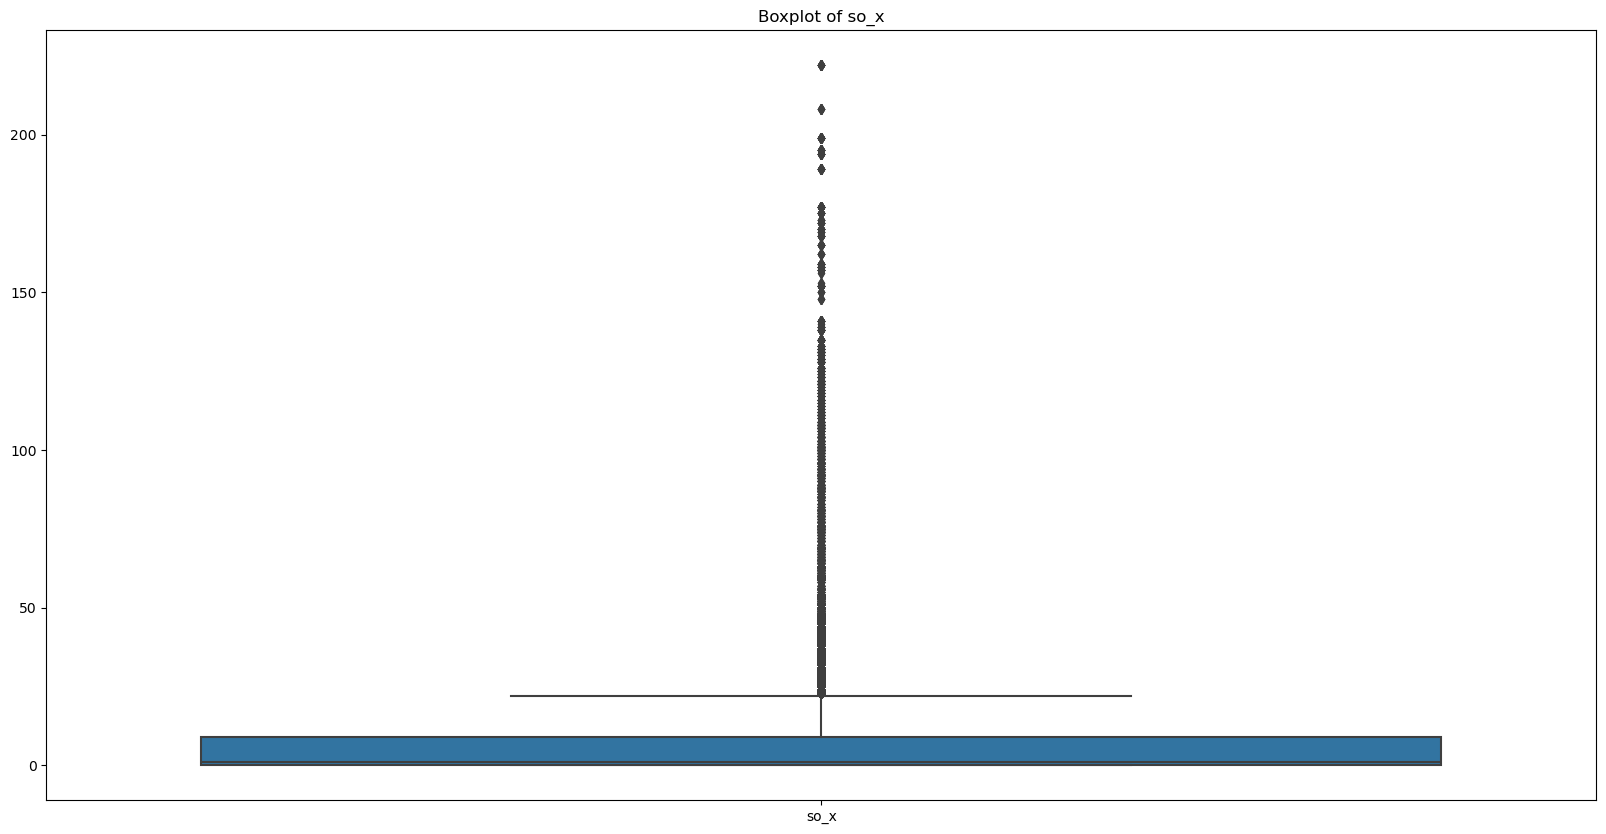

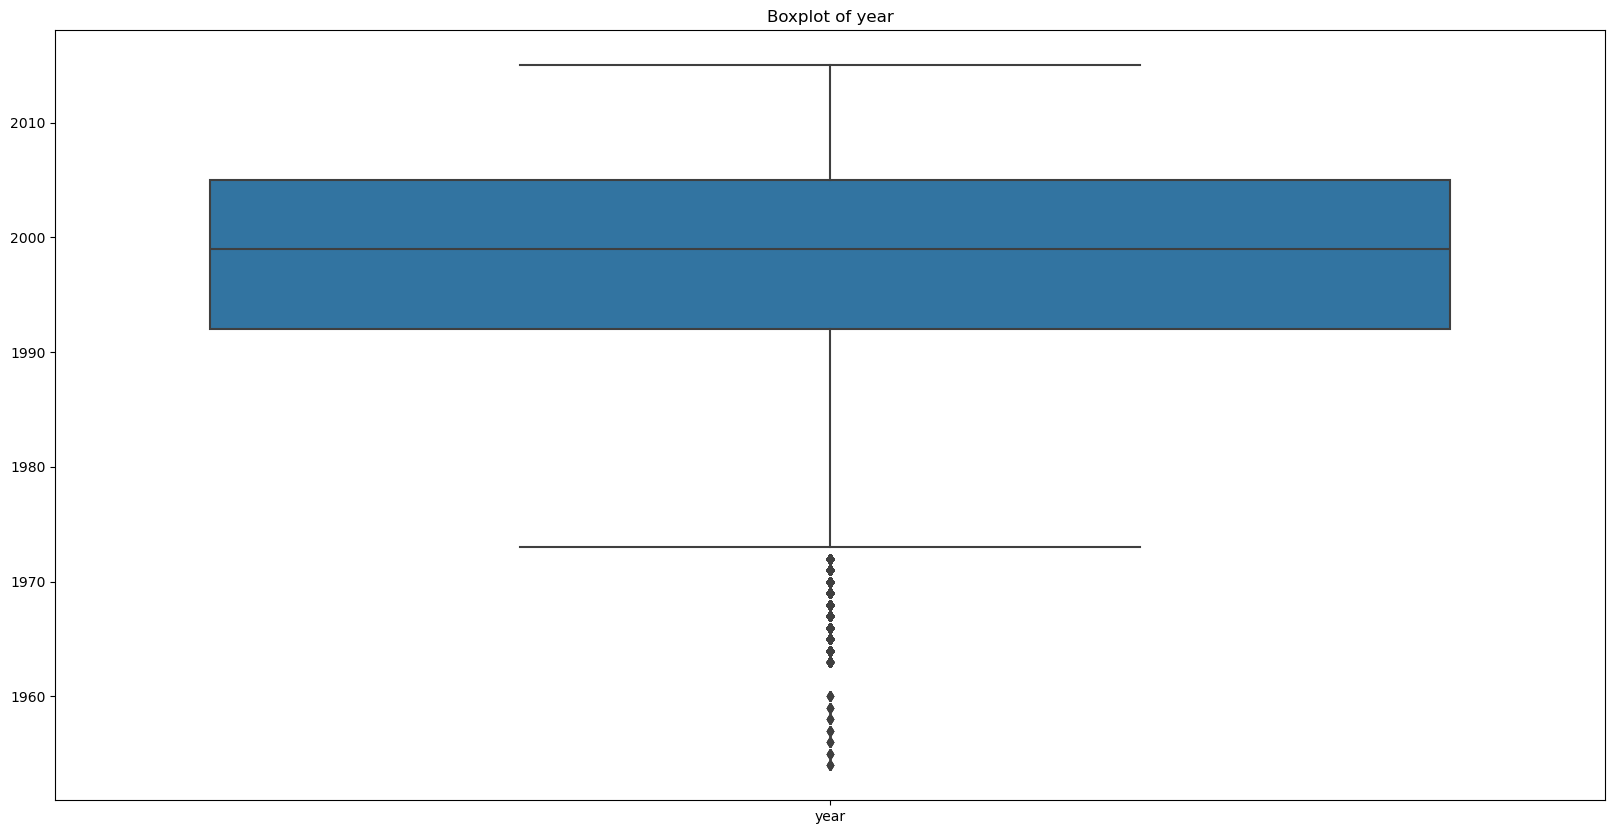

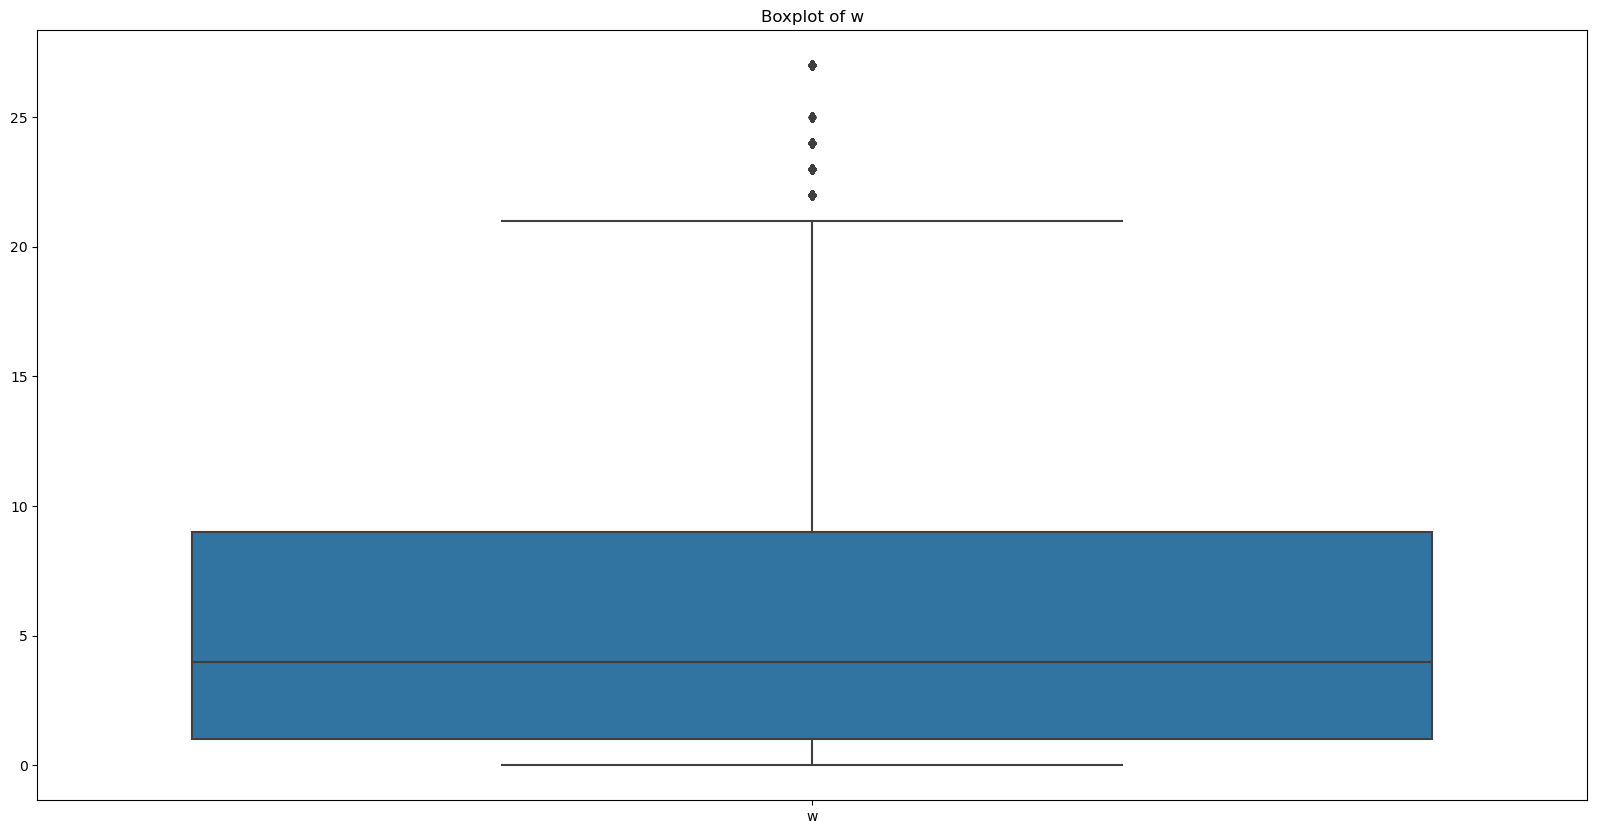

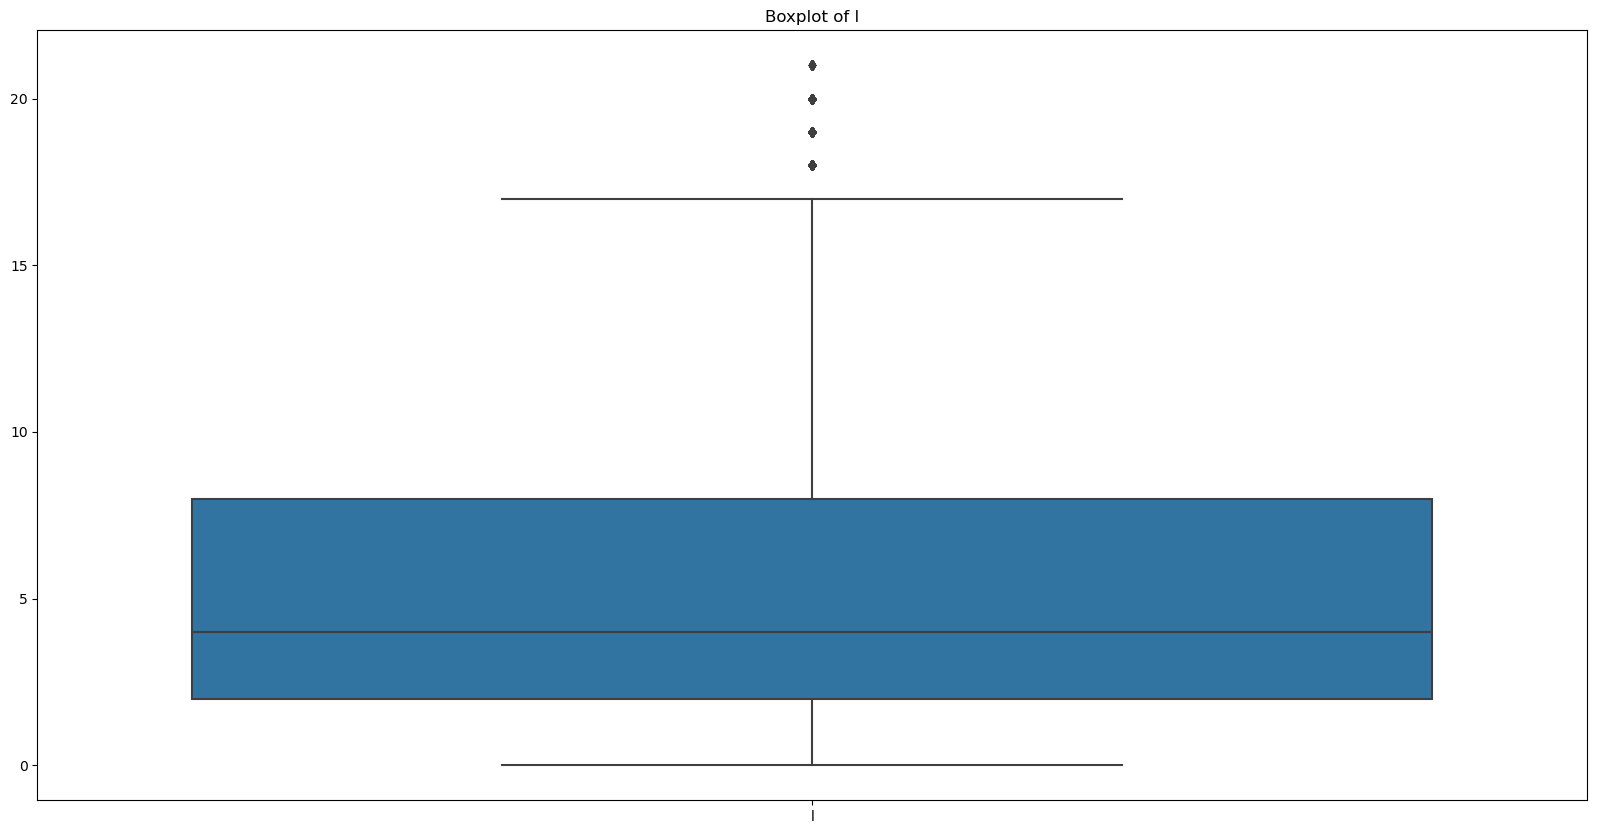

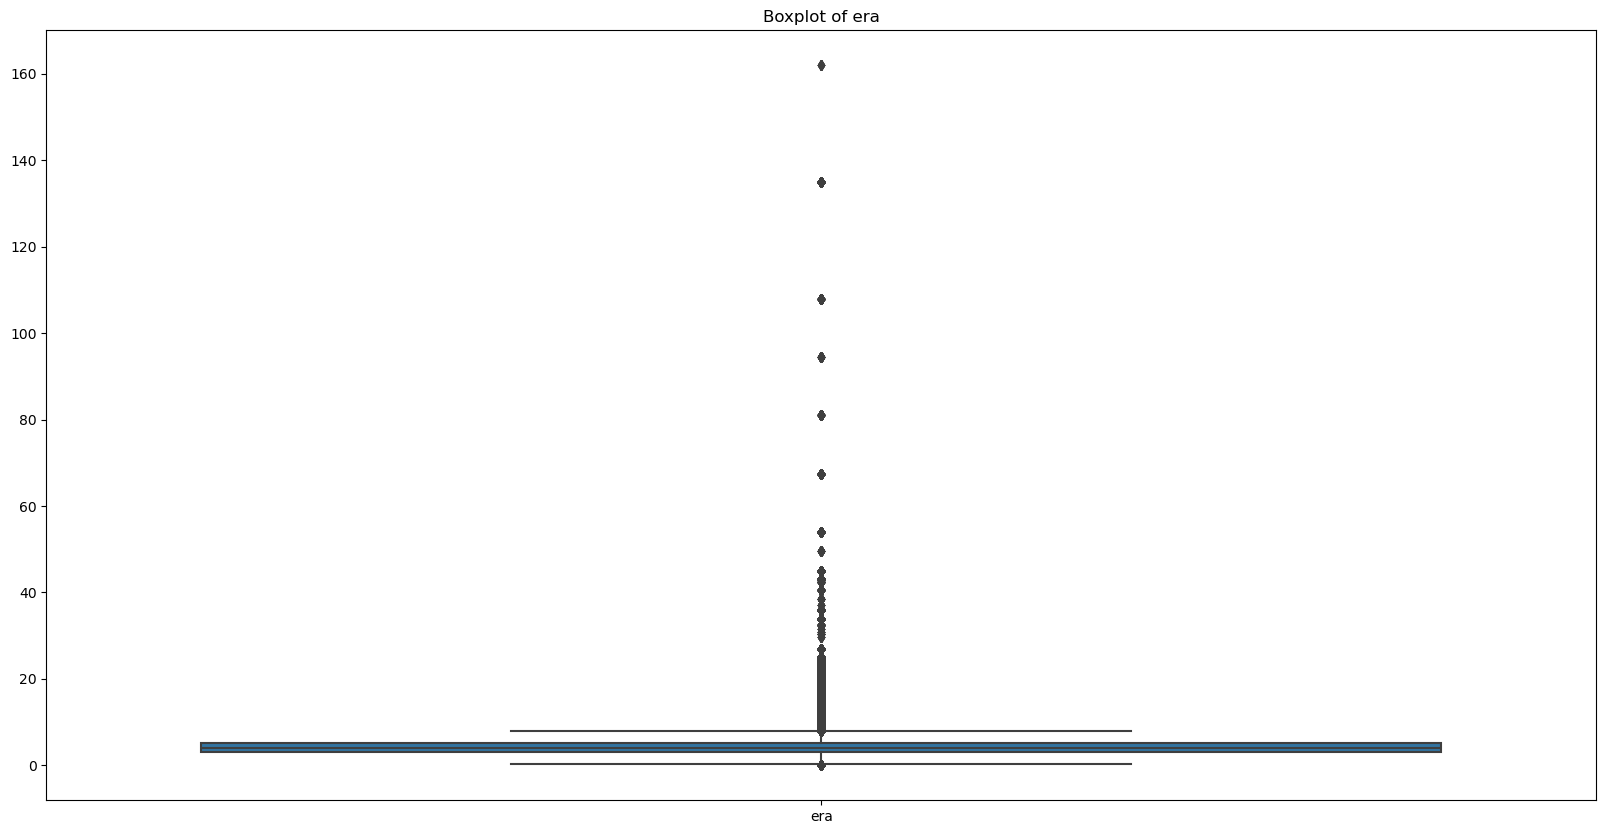

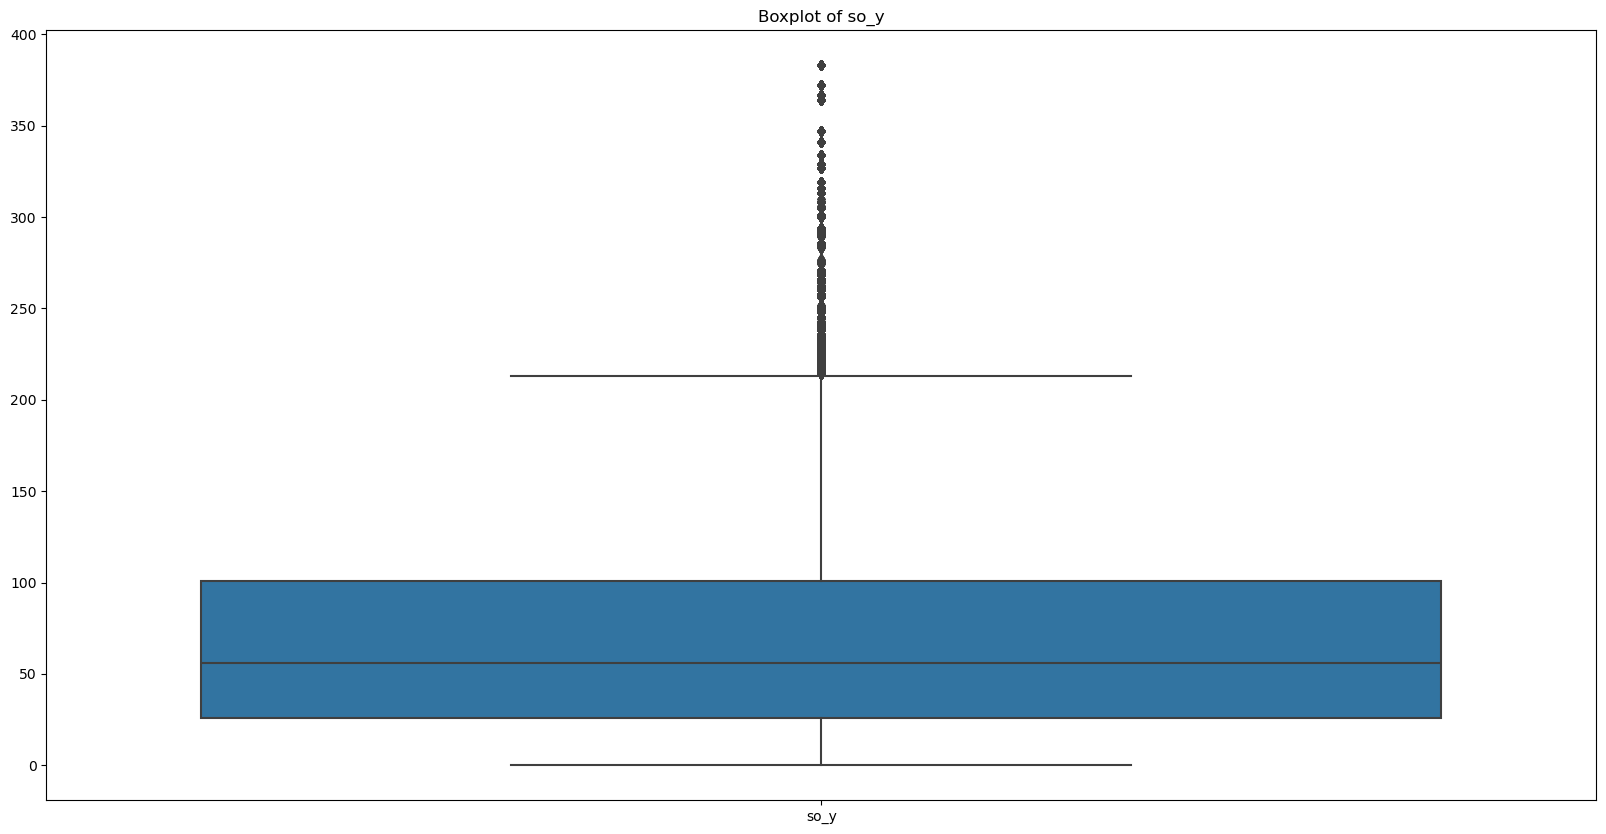

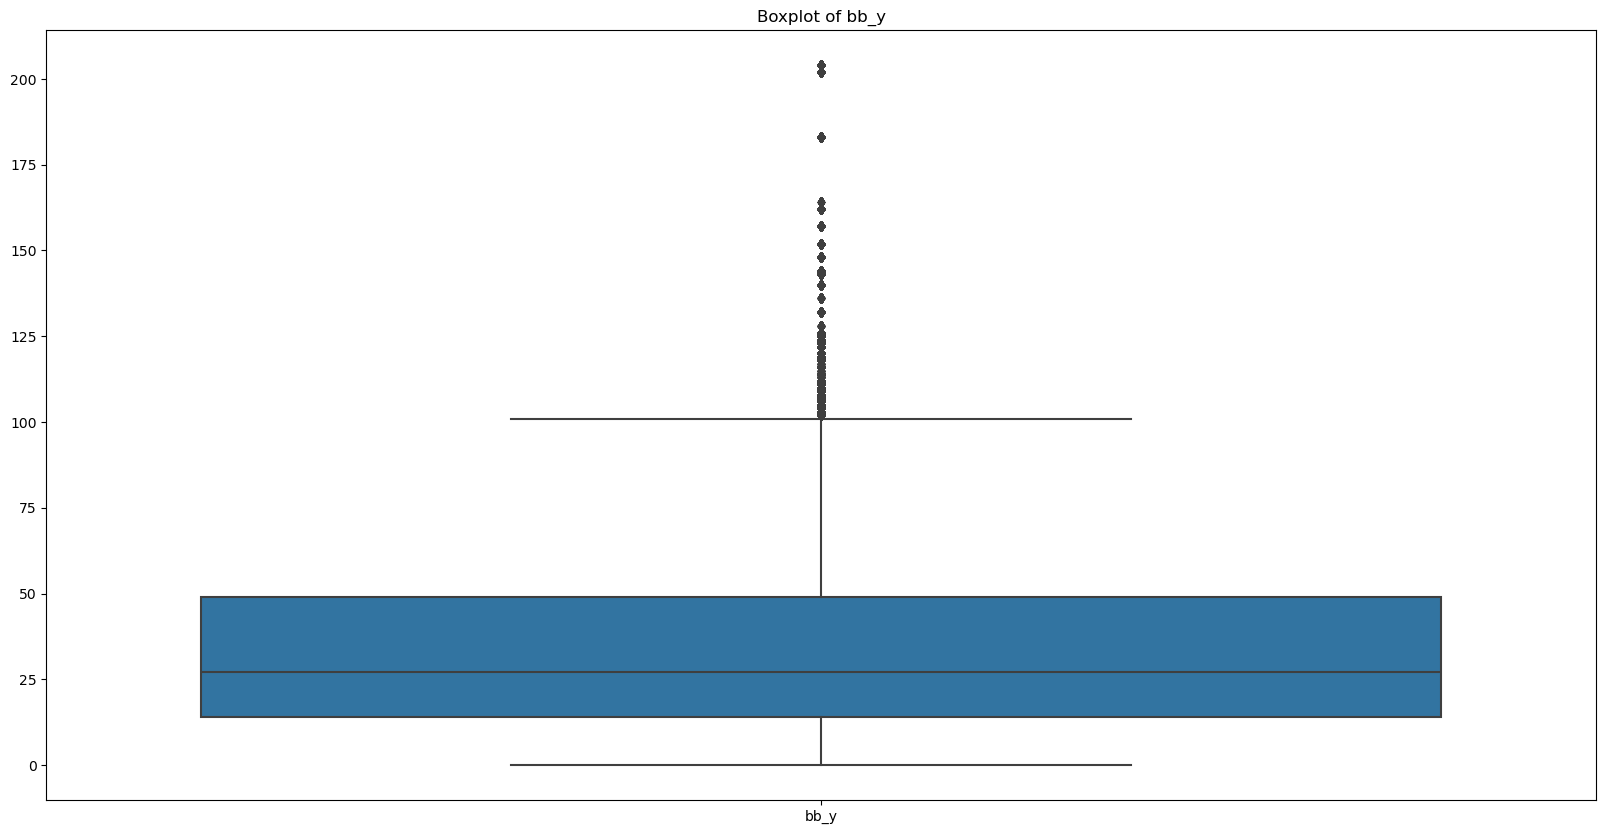

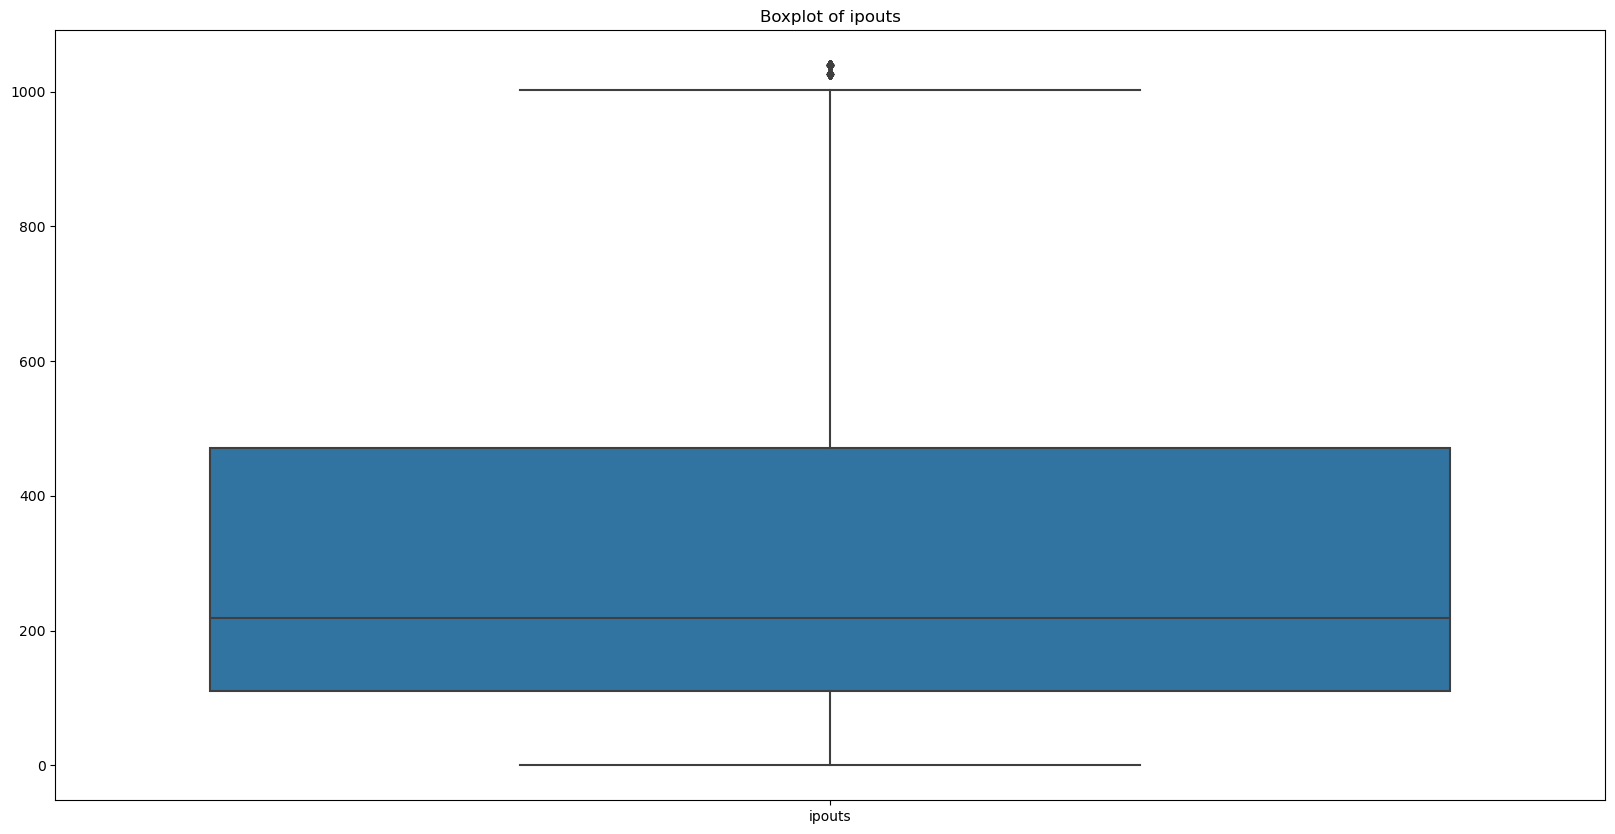

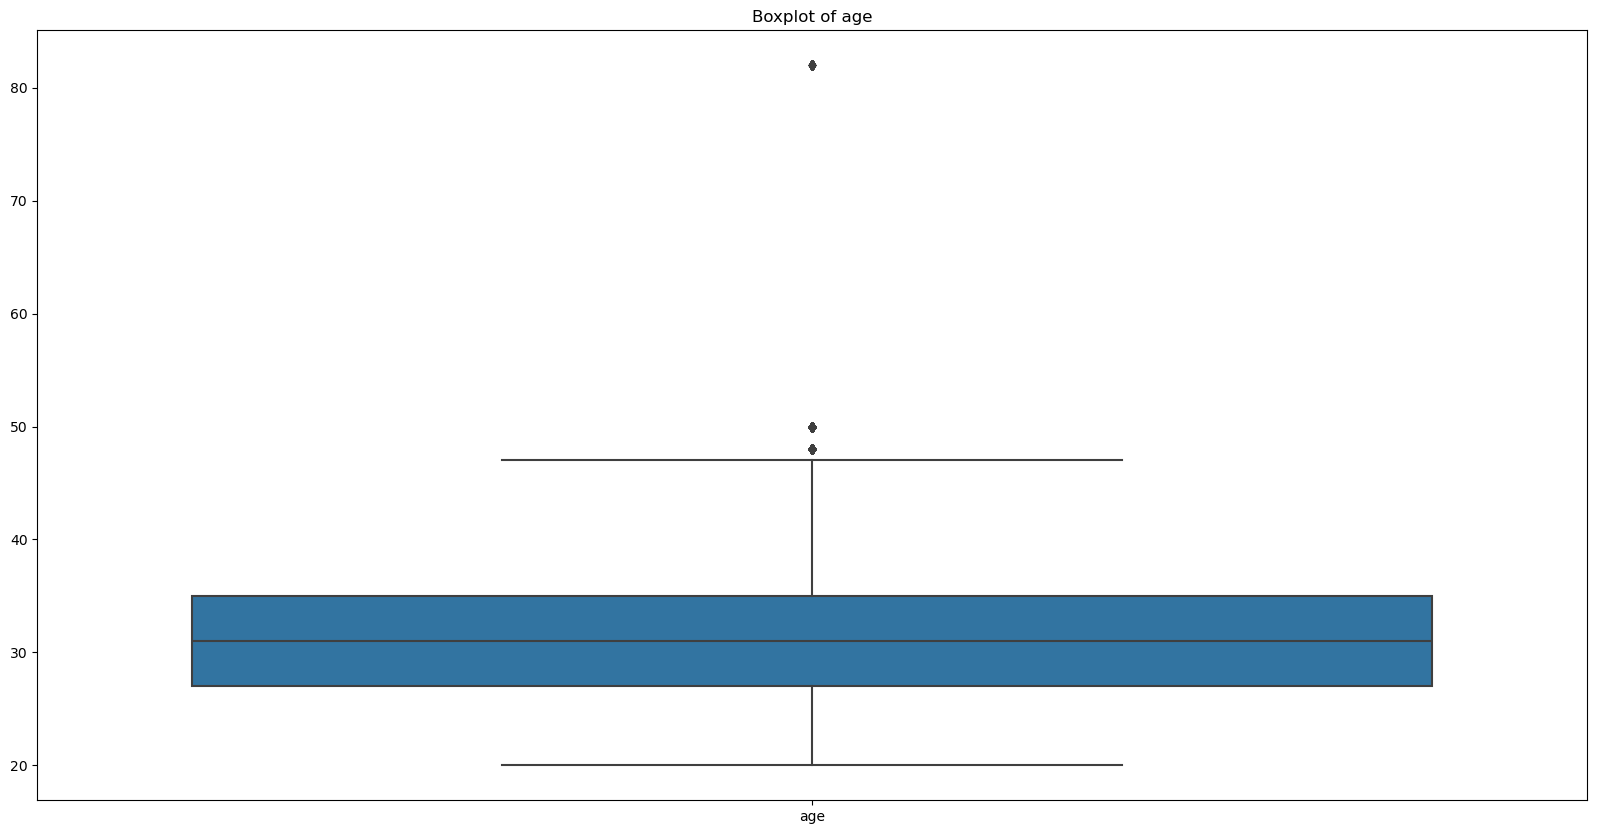

In [90]:
# Boxplots to check for outliers
num_cols = final_data_cleaned.select_dtypes(include=[np.number]).columns
for column in num_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=final_data_cleaned[[column]])
    plt.title(f'Boxplot of {column}')
    plt.show()

C:\Users\Henry Lim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x400 with 0 Axes>

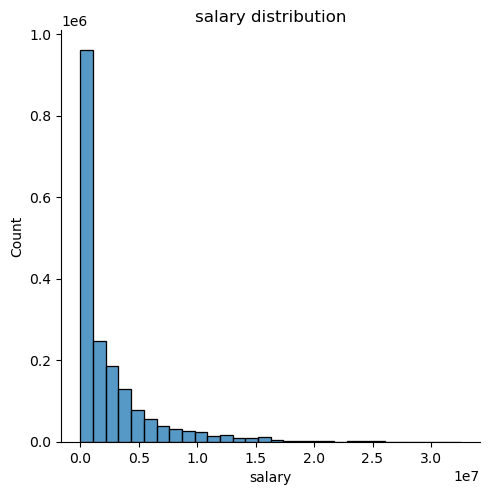

In [91]:
plt.figure(figsize=[8,4])
sns.displot(final_data_cleaned['salary'], bins=30)
plt.title('salary distribution')
plt.show()

### Step 3: Data Cleansing and Transformation

#### Outlier Trimming

In [92]:
def find_boundaries(final_data_cleaned, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = final_data_cleaned[variable].quantile(0.75) - final_data_cleaned[variable].quantile(0.25)

    lower_boundary = final_data_cleaned[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = final_data_cleaned[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [93]:
# find limits for birth_year

birth_year_upper_limit, birth_year_lower_limit = find_boundaries(final_data_cleaned, 'birth_year', 1.5)
birth_year_upper_limit, birth_year_lower_limit

(1992.0, 1944.0)

In [94]:
# find limits for weight

weight_upper_limit, weight_lower_limit = find_boundaries(final_data_cleaned, 'weight', 1.5)
weight_upper_limit, weight_lower_limit

(260.0, 140.0)

In [95]:
# find limits for height

height_upper_limit, height_lower_limit = find_boundaries(final_data_cleaned, 'height', 1.5)
height_upper_limit, height_lower_limit

(80.5, 68.5)

In [96]:
# find limits for year

year_upper_limit, year_lower_limit = find_boundaries(final_data_cleaned, 'year', 1.5)
year_upper_limit, year_lower_limit

(2024.5, 1972.5)

In [97]:
# find limits for w

w_upper_limit, w_lower_limit = find_boundaries(final_data_cleaned, 'w', 1.5)
w_upper_limit, w_lower_limit

(21.0, -11.0)

In [98]:
# find limits for l

l_upper_limit, l_lower_limit = find_boundaries(final_data_cleaned, 'l', 1.5)
l_upper_limit, l_lower_limit

(17.0, -7.0)

In [99]:
# find limits for ipouts

ipouts_upper_limit, ipouts_lower_limit = find_boundaries(final_data_cleaned, 'ipouts', 1.5)
ipouts_upper_limit, ipouts_lower_limit

(1012.5, -431.5)

In [100]:
# find limits for age

age_upper_limit, age_lower_limit = find_boundaries(final_data_cleaned, 'age', 1.5)
age_upper_limit, age_lower_limit

(47.0, 15.0)

In [101]:
# let's flag the outliers in the data set

outliers_birth_year = np.where(final_data_cleaned['birth_year'] > birth_year_upper_limit, True,
                       np.where(final_data_cleaned['birth_year'] < birth_year_lower_limit, True, False))

In [102]:
# let's flag the outliers in the data set

outliers_weight = np.where(final_data_cleaned['weight'] > weight_upper_limit, True,
                       np.where(final_data_cleaned['weight'] < weight_lower_limit, True, False))

In [103]:
# let's flag the outliers in the data set

outliers_height = np.where(final_data_cleaned['height'] > height_upper_limit, True,
                       np.where(final_data_cleaned['height'] < height_lower_limit, True, False))

In [104]:
# let's flag the outliers in the data set

outliers_year = np.where(final_data_cleaned['year'] > year_upper_limit, True,
                       np.where(final_data_cleaned['year'] < year_lower_limit, True, False))

In [105]:
# let's flag the outliers in the data set

outliers_w = np.where(final_data_cleaned['w'] > w_upper_limit, True,
                       np.where(final_data_cleaned['w'] < w_lower_limit, True, False))

In [106]:
# let's flag the outliers in the data set

outliers_l = np.where(final_data_cleaned['l'] > l_upper_limit, True,
                       np.where(final_data_cleaned['l'] < l_lower_limit, True, False))

In [107]:
# let's flag the outliers in the data set

outliers_ipouts = np.where(final_data_cleaned['ipouts'] > ipouts_upper_limit, True,
                       np.where(final_data_cleaned['ipouts'] < ipouts_lower_limit, True, False))

In [108]:
# let's flag the outliers in the data set

outliers_age = np.where(final_data_cleaned['age'] > age_upper_limit, True,
                       np.where(final_data_cleaned['age'] < age_lower_limit, True, False))

In [109]:
# let's trim the dataset by removing outliers_birth_year + outliers_weight + outliers_height + outliers_year + outliers_w + outliers_l + outliers_ipouts + outliers_age

df_trimmed = final_data_cleaned.loc[~(outliers_birth_year + outliers_weight + outliers_height + outliers_year + outliers_w + outliers_l + outliers_ipouts + outliers_age) ]

final_data_cleaned.shape, df_trimmed.shape

((1851017, 31), (1786009, 31))

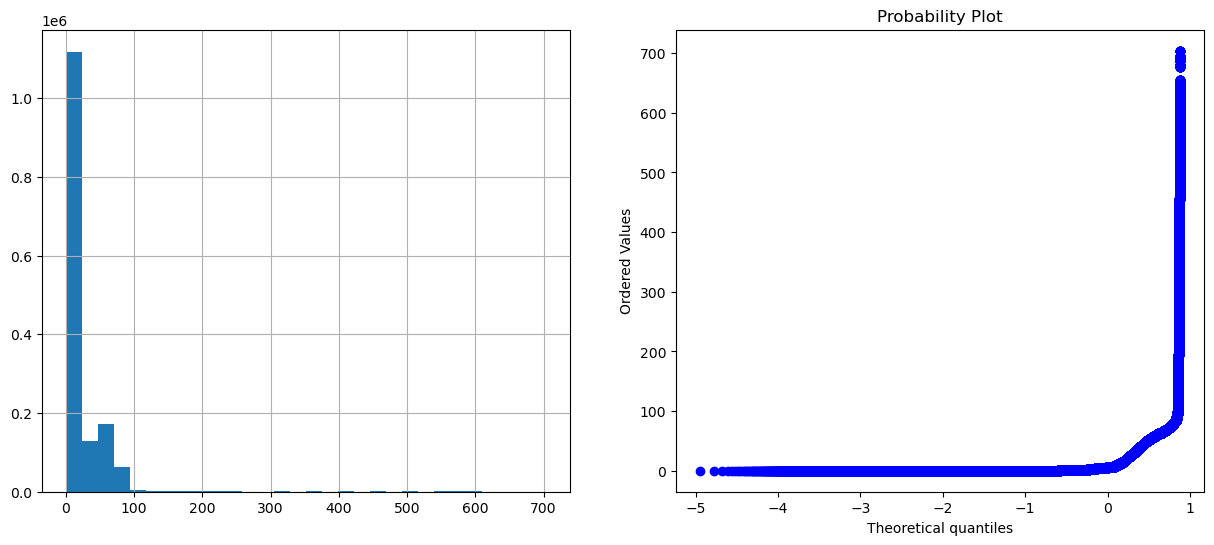

In [110]:
# Plot histogram and Q-Q plots for variable Instrumentalness
# to have a look at the variable distribution

def diagnostic_plots(final_data_cleaned, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    final_data_cleaned[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(final_data_cleaned[variable], dist="norm", plot=plt)

    plt.show()

diagnostic_plots(final_data_cleaned, 'ab')

In [111]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
cols = ['ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb_x', 'so_x']
transformer.fit(df_trimmed[cols])

PowerTransformer(standardize=False)

In [112]:
transformer.lambdas_

df_tf = transformer.transform(df_trimmed[cols])
df_tf = pd.DataFrame(df_tf, columns=cols)

# Correctly assign the transformed values back to the original dataframe
df_trimmed.loc[:, cols] = df_tf

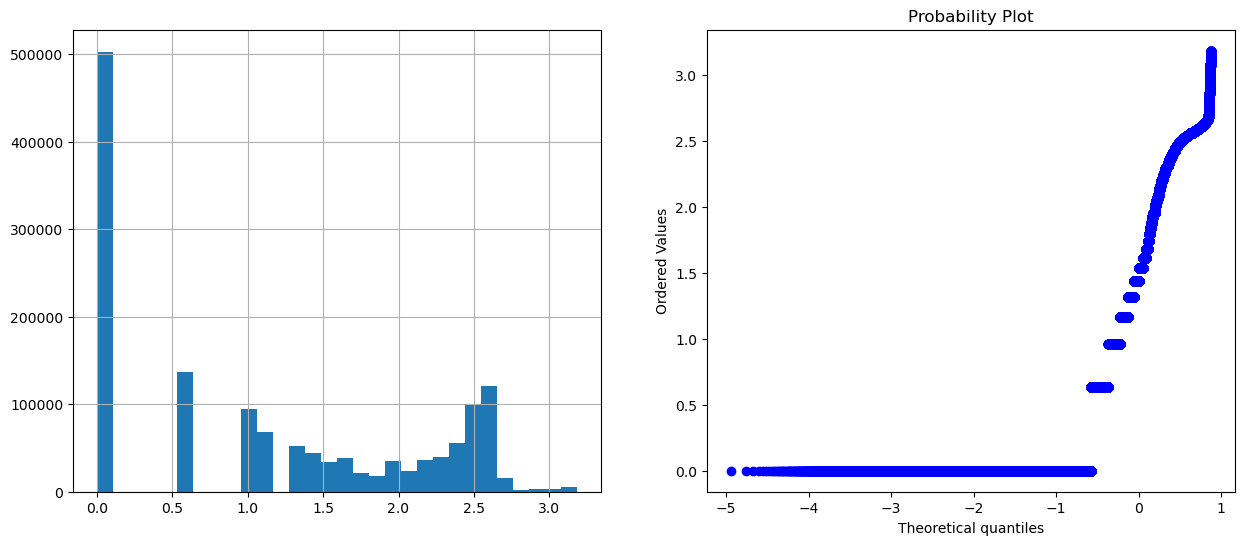

In [113]:
diagnostic_plots(df_tf, 'ab')

#### Train and Test Split

In [114]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df_trimmed.drop(labels=['player_id', 'salary', 'name_first', 'name_last', 'name_given', 'debut', 'final_game'], axis=1),  # predictors
    df_trimmed['salary'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1250206, 24), (535803, 24))

In [115]:
y_train.shape, y_test.shape

((1250206,), (535803,))

#### Missing Value Imputation

In [116]:
# find the categorical variables
cat_cols = [c for c in X_train.columns if X_train[c].dtypes == 'O']
X_train[cat_cols].isnull().mean().sort_values()

team_id_x        0.0
birth_country    0.0
bats             0.0
throws           0.0
dtype: float64

In [117]:
missing_percentage = (X_train.isnull().mean() * 100)
 
missing_percentage

year_x            0.000000
team_id_x         0.000000
birth_year        0.000000
birth_country     0.000000
weight            0.000000
height            0.000000
bats              0.000000
throws            0.000000
ab               21.692265
r                21.692265
h                21.692265
hr               21.692265
rbi              21.692265
sb               21.692265
bb_x             21.692265
so_x             21.692265
year              0.000000
w                 0.000000
l                 0.000000
era               0.045912
so_y              0.000000
bb_y              0.000000
ipouts            0.000480
age               0.000000
dtype: float64

In [118]:
for var in ['ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb_x', 'so_x', 'era', 'ipouts']:

    value = X_train[var].median()
    print(value)

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

0.9582272893619327
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.5954134671574792
4.03
214.0


In [119]:
pd.DataFrame(X_train).isnull().sum()

year_x           0
team_id_x        0
birth_year       0
birth_country    0
weight           0
height           0
bats             0
throws           0
ab               0
r                0
h                0
hr               0
rbi              0
sb               0
bb_x             0
so_x             0
year             0
w                0
l                0
era              0
so_y             0
bb_y             0
ipouts           0
age              0
dtype: int64

#### Categorical Encoding

In [120]:
# find the categorical variables
cat_cols = [c for c in X_train.columns if X_train[c].dtypes == 'O']
X_train[cat_cols].isnull().mean().sort_values()

team_id_x        0.0
birth_country    0.0
bats             0.0
throws           0.0
dtype: float64

In [121]:
# Encode final_data_trimmed using One-Hot-Encoding
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [122]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [123]:
ohe_enc.variables

In [124]:
# let's transform train and test set
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

X_train_enc.head()

,year_x,birth_year,weight,height,ab,r,h,hr,rbi,sb,...,birth_country_France,birth_country_Jamaica,birth_country_Colombia,birth_country_Philippines,birth_country_Taiwan,birth_country_Afghanistan,birth_country_Indonesia,bats_R,bats_L,throws_R
1583166,2009,1967.0,160.0,69.0,2.541802,0.485754,0.910493,-0.0,0.375056,-0.0,...,0,0,0,0,0,0,0,1,0,1
675209,1995,1970.0,245.0,75.0,0.958227,-0.000000,-0.000000,-0.0,-0.000000,-0.0,...,0,0,0,0,0,0,0,0,1,0
745287,1996,1962.0,205.0,77.0,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,...,0,0,0,0,0,0,0,0,1,0
357506,1991,1966.0,195.0,73.0,2.288464,0.518349,0.910493,-0.0,0.444533,-0.0,...,0,0,0,0,0,0,0,0,0,1
474912,1993,1966.0,180.0,77.0,0.635380,-0.000000,-0.000000,-0.0,-0.000000,-0.0,...,0,0,0,0,0,0,0,1,0,1


#### Variable Discretization/Binning

In [125]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['ab', 'r', 'h', 'hr', 'rbi', 'bb_x', 'so_x', 'era'], return_object=True)

disc.fit(X_train_enc)

EqualFrequencyDiscretiser(return_object=True,
                          variables=['ab', 'r', 'h', 'hr', 'rbi', 'bb_x',
                                     'so_x', 'era'])

In [126]:
disc.binner_dict_

{'ab': [-inf,
  0.635380083313038,
  0.9582272893619327,
  1.4384547163481556,
  2.1591912446282797,
  2.5236145107703614,
  inf],
 'r': [-inf, 0.40027764652970915, 0.5183487895930186, inf],
 'h': [-inf, 0.508682725195688, 0.773073745814008, 0.9104926285895252, inf],
 'hr': [-inf, inf],
 'rbi': [-inf, 0.37505561443065044, 0.46885535893428854, inf],
 'bb_x': [-inf, 0.333513317146985, 0.3805726078627475, inf],
 'so_x': [-inf,
  0.5954134671574792,
  0.86666933975754,
  1.3951566535700515,
  1.631095692292133,
  inf],
 'era': [-inf, 2.44, 2.98, 3.36, 3.68, 4.03, 4.38, 4.81, 5.4, 6.52, inf]}

In [127]:
# transform train and test sets

train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

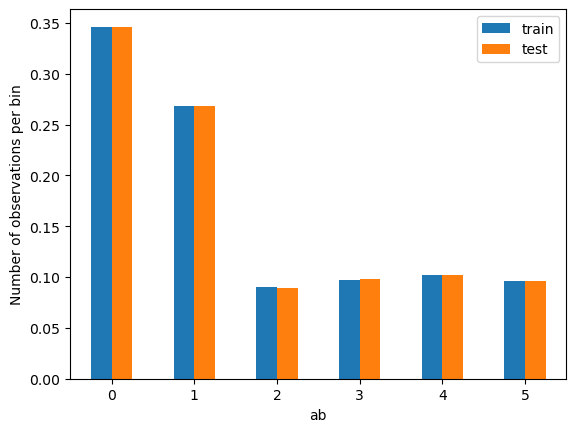

In [128]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Instrumentalness
# calculate proportion of observations per interval
t1 = train_t.groupby(['ab'])['ab'].count() / len(train_t)
t2 = test_t.groupby(['ab'])['ab'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

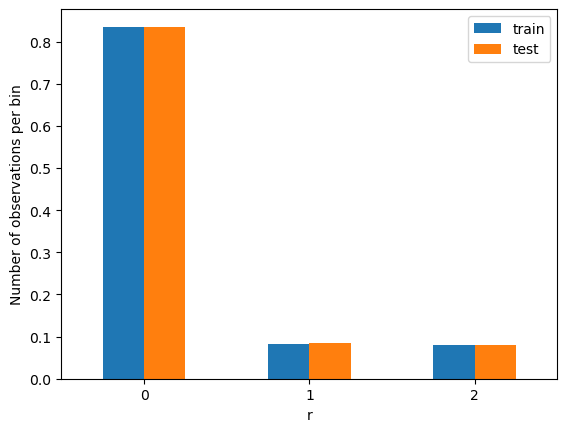

In [129]:
t1 = train_t.groupby(['r'])['r'].count() / len(train_t)
t2 = test_t.groupby(['r'])['r'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

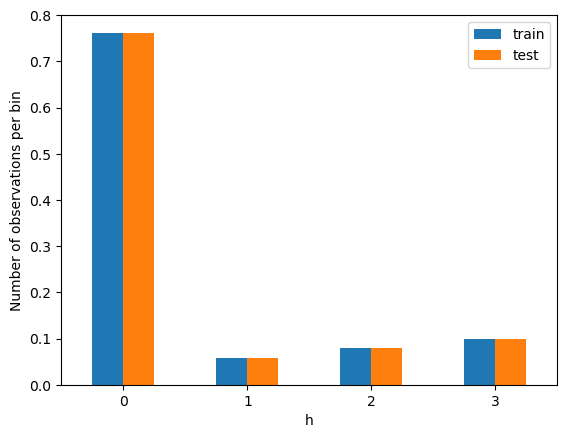

In [130]:
t1 = train_t.groupby(['h'])['h'].count() / len(train_t)
t2 = test_t.groupby(['h'])['h'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

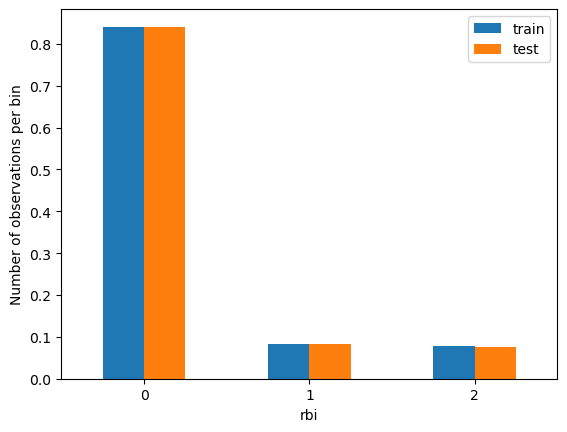

In [131]:
t1 = train_t.groupby(['rbi'])['rbi'].count() / len(train_t)
t2 = test_t.groupby(['rbi'])['rbi'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

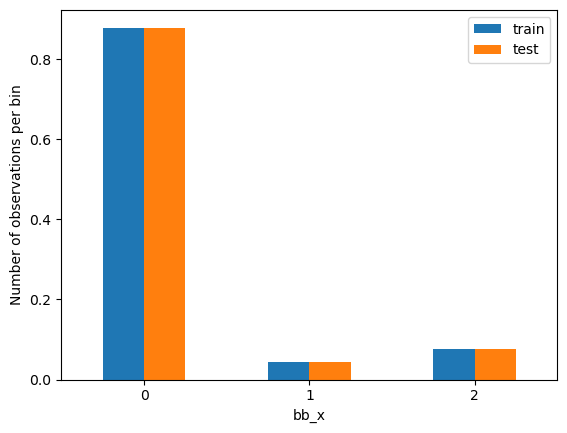

In [132]:
t1 = train_t.groupby(['bb_x'])['bb_x'].count() / len(train_t)
t2 = test_t.groupby(['bb_x'])['bb_x'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

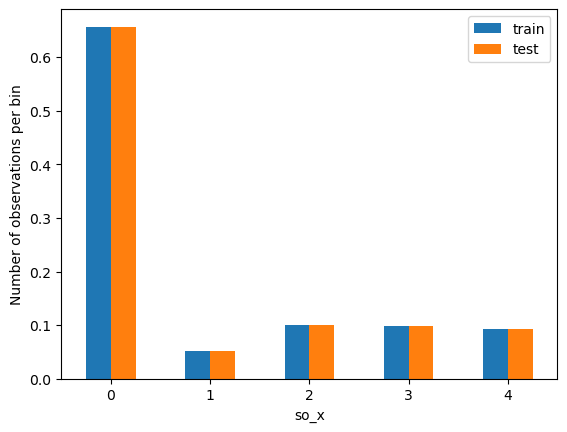

In [133]:
t1 = train_t.groupby(['so_x'])['so_x'].count() / len(train_t)
t2 = test_t.groupby(['so_x'])['so_x'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

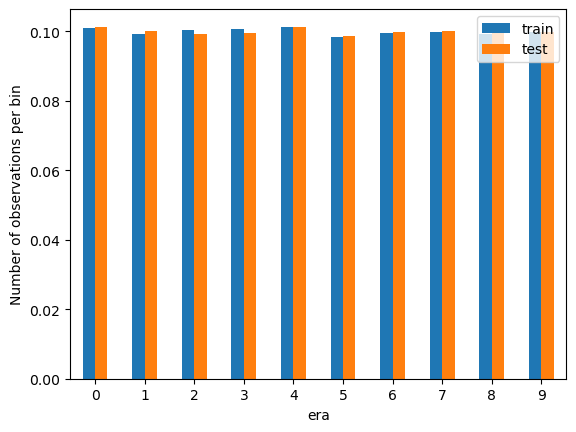

In [134]:
t1 = train_t.groupby(['era'])['era'].count() / len(train_t)
t2 = test_t.groupby(['era'])['era'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

#### Feature Engineer

In [135]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

### Step 4: Machine Learning Modelling

In [137]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

2403045.840991005
The train mean target value is 2403045.84.


In [138]:
y_train_preds_naive = [round(mean_target_value, 2) for _ in range(train_t.shape[0])]
y_train_preds_naive[0:5]

[2403045.84, 2403045.84, 2403045.84, 2403045.84, 2403045.84]

In [139]:
# insert code here
y_test_preds_naive = [round(mean_target_value, 2) for row in range(test_t.shape[0])]
y_test_preds_naive[0:5]

[2403045.84, 2403045.84, 2403045.84, 2403045.84, 2403045.84]

In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 10785963312755.15.
The Naive Baseline Model's MSE on test data is 10714055988525.79.

The Naive Baseline Model's RMSE on train data is 3284199.04.
The Naive Baseline Model's RMSE on test data is 3273233.26.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(train_t, y_train)

In [142]:
y_train_preds_linreg = linreg.predict(train_t)
y_test_preds_linreg = linreg.predict(test_t)

In [143]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 6683492993631.0996.
The LinReg Model's MSE on test data is 6632184095601.4893.

The LinReg Model's RMSE on train data is 2585245.2483.
The LinReg Model's RMSE on test data is 2575302.7192.

The LinReg Model's R2 on train data is 0.3804.
The LinReg Model's R2 on test data is 0.3810.


C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [144]:
from sklearn.linear_model import LinearRegression

linreg_ss = LinearRegression().fit(X_train_scaled, y_train)

In [145]:
y_train_preds_linreg_ss = linreg_ss.predict(X_train_scaled)
y_test_preds_linreg_ss = linreg_ss.predict(X_test_scaled)

In [146]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on train data is {train_mse_linreg_ss:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on test data is {test_mse_linreg_ss:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on train data is {train_rmse_linreg_ss:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on test data is {test_rmse_linreg_ss:.4f}.")

print()

# R-squared (Coefficient of Determination, 1.0 is best possible score)

# train R² score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R² on train data is {train_r2_linreg_ss:.4f}.")

# test R² score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R² on test data is {test_r2_linreg_ss:.4f}.")

The LinRegSS Model's MSE on train data is 6683492857723.7979.
The LinRegSS Model's MSE on test data is 6632188356938.5371.

The LinRegSS Model's RMSE on train data is 2585245.2220.
The LinRegSS Model's RMSE on test data is 2575303.5466.

The LinRegSS Model's R² on train data is 0.3804.
The LinRegSS Model's R² on test data is 0.3810.


C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Transform the target variable (salary) to millions
y_train_transformed = y_train / 1_000_000
y_test_transformed = y_test / 1_000_000

# Fit the model
translinreg_ss = LinearRegression().fit(X_train_scaled, y_train_transformed)

# Make predictions
y_train_preds_translinreg_ss = translinreg_ss.predict(X_train_scaled)
y_test_preds_translinreg_ss = translinreg_ss.predict(X_test_scaled)

# Mean Squared Error (the lower the better, 0 is best possible score)

# Train MSE score
train_mse_translinreg_ss = mean_squared_error(y_train_transformed, y_train_preds_translinreg_ss)
print(f"The LinRegSS Model's MSE on train data is {train_mse_translinreg_ss:.4f}.")

# Test MSE score
test_mse_translinreg_ss = mean_squared_error(y_test_transformed, y_test_preds_translinreg_ss)
print(f"The LinRegSS Model's MSE on test data is {test_mse_translinreg_ss:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# Train RMSE score
train_rmse_translinreg_ss = mean_squared_error(y_train_transformed, y_train_preds_translinreg_ss, squared=False)
print(f"The LinRegSS Model's RMSE on train data is {train_rmse_translinreg_ss:.4f}.")

# Test RMSE score
test_rmse_translinreg_ss = mean_squared_error(y_test_transformed, y_test_preds_translinreg_ss, squared=False)
print(f"The LinRegSS Model's RMSE on test data is {test_rmse_translinreg_ss:.4f}.")

print()

# R-squared (Coefficient of Determination, 1.0 is best possible score)

# Train R² score
train_r2_translinreg_ss = r2_score(y_train_transformed, y_train_preds_translinreg_ss)
print(f"The LinRegSS Model's R² on train data is {train_r2_translinreg_ss:.4f}.")

# Test R² score
test_r2_translinreg_ss = r2_score(y_test_transformed, y_test_preds_translinreg_ss)
print(f"The LinRegSS Model's R² on test data is {test_r2_translinreg_ss:.4f}.")


The LinRegSS Model's MSE on train data is 6.6835.
The LinRegSS Model's MSE on test data is 6.6322.

The LinRegSS Model's RMSE on train data is 2.5852.
The LinRegSS Model's RMSE on test data is 2.5753.

The LinRegSS Model's R² on train data is 0.3804.
The LinRegSS Model's R² on test data is 0.3810.


C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Henry Lim\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Report <a id = "start">

## Table Of Contents <a id = "top">

### [Report](#start)

### [Introduction with Value based Problem Statement](#intro)
   - [Introduction](#background)
   - [Value-Based Problem Statement](#problem)
            
### [Problem Formulation](#problem)
   - [Load and Explore the Data](#overview)
   - [Initial Data Exploration](#datastate)
   - [Understand the Data](#datainfo)
   - [Problem Formulation](#target)
 
### [Data Wrangling on Multiple Tables](#wrangling)
   - [Extract features from different tables](#extract)
   - [Concatenate, Merge, or Join the Tables](#merge)
   - [Further Steps](#further)
   - [Detailed Breakdown of the Process](#breakdown)

### [Data Cleansing and Transformation](#datacleansing)
   - [Outlier Trimming](#outlier)
   - [Train-Test Split](#traintest)
   - [Missing Value Imputation](#missingvalues)
   - [Categorical Encoding](#ohe)
   - [Standardization](#standardization)
   - [Power Transformer - Yeo-Johnson](#transform)
   - [Feature Engineering](#feature)
    
### [Machine Learning Model: Building and Evaluation Against a Naïve Baseline Model](#model)
   - [Introduction](#introduction)
   - [Naive Baseline Model](#naive)
   - [Building the Machine Learning Model](#building)
   - [Model Evaluation (Pre-Scaling)](#pre)
   - [Model Evaluation (Post-Scaling)](#post)
   - [Linear Regression Model Comparison](#linearcompare)
   - [Comparison with Naive Baseline Model](#naivecompare)
   - [Conclusion](#conclusion)

### 7. [Summary and Further Improvements](#end)
   - [Summary of Findings](#summary)
   - [Further Improvements](#furtherimprovements)
   
### 8. [Reflection](#reflection)

### Introduction with Value based Problem Statement <a id = "intro">

#### Introduction <a id = "background">

In professional sports, the financial valuation of players extends beyond mere performance metrics, delving into aspects such as marketability, team needs, and overall contribution to team success. Baseball, renowned for its comprehensive statistical recording and analysis, presents an intriguing field for investigating the determinants of player salaries. This analysis aims to decipher the critical factors influencing baseball player salaries and to develop predictive models that can accurately estimate these salaries based on available data. Such insights are invaluable for team management, players, and stakeholders, aiding in contract negotiations, talent acquisition, and strategic decision-making.

The financial aspect of player management is as crucial as their performance on the field. Understanding the intricate relationship between player statistics and their salaries can provide a competitive edge in managing team budgets, negotiating contracts, and scouting for talent. By leveraging extensive performance data, this study seeks to shed light on the economic value of baseball players, thereby assisting stakeholders in making data-driven decisions.

#### Value-Based Problem Statement <a id = "problem">

The primary objective of this analysis is to identify and quantify the performance metrics that significantly impact baseball player salaries. In doing so, we aim to achieve the following:

1. **Identify key metrics:** Determine which performance indicators, such as at bats, home runs, strikeouts, etc, have an influence on player salaries. By pinpointing these metrics, team management can better understand what drives a player's salary
   
2. **Create ML models:** Construct robust predictive models that can estimate player salaries based on their performance metrics and demographic information. These models will serve as tools for teams to forecast future salary demands and evaluate potential signings or trades.
   
3. **Offering actionable insights:** Offer insights and recommendations that can help team management optimize their budget allocations and negotiation strategies. Understanding the financial implications of player performance allows for more strategic planning and resource distribution.

The data for this analysis is drawn from multiple sources, encompassing detailed player information, performance records, and salary statistics. By merging and meticulously cleaning these datasets, we create a comprehensive overview of the factors at play. The analysis will involve data wrangling methods, including handling missing values, addressing outliers, and transforming variables to enhance model performance.

Through this approach, the study not only aims to predict player salaries but also to enhance the understanding of the economic dynamics within professional baseball. The findings will be instrumental for teams striving to balance performance and budget, ultimately contributing to more effective and financially sound decision-making in the sport.


### Problem Formulation <a id = "problem">

#### Load and Explore the Data <a id = "overview">

Data Sources and Collection:

The data is drawn from several distinct files, each offering a unique aspect of player performance and demographic details. The primary files include:

Batting Data: This file contains detailed batting statistics for players, including at-bats (AB), runs (R), hits (H), home runs (HR), runs batted in (RBI), stolen bases (SB), bases on balls (BB), and strikeouts (SO). These statistics provide a comprehensive view of a player's offensive performance.

Pitching Data: This file contains pitching statistics, including wins (W), losses (L), earned run average (ERA), strikeouts (SO), bases on balls (BB), and outs pitched (IPouts). These statistics are essential for evaluating the performance of pitchers.

Player Data: This file provides demographic information about players, such as birth year, weight, height, and other personal details. Demographics can play a significant role in understanding player performance and career longevity.

Salary Data: This file contains salary information for players, which serves as the target variable for our prediction problem. Understanding the factors that influence player salaries is a key objective of this analysis.

#### Initial Data Exploration: <a id = "datastate">
With the data loaded, the next step is to explore and understand its structure. This involves a series of actions designed to gain insights into the data's characteristics and identify any potential issues that need to be addressed.

Using functions such as .head(), .info(), .describe(), isnull().sum(), and identifying categorical columns allows us to gain insights into the dataset:

The .head() function: Used to view the first few rows of a dataset, providing a quick overview of the data and its structure.
The .info() function: Shows that the dataset has 45 columns with data types mostly being float64, object, int64, and datetime64. It depicts 45 column names and 1,851,017 entries.
The .describe() function: Provides statistics like count, mean, standard deviation, minimum and maximum values, and quartiles.
The isnull().sum() function: Displays the sum of missing values per feature, helping to understand the distribution of missing data.
Identifying categorical columns: Lists categorical variables that might require encoding or special handling.

#### Understand the Data <a id = "datainfo">

**Graph 1 - Correlation Heatmap:**
The correlation heatmap provides a visual representation of the correlation coefficients between different variables in the dataset, including ab (at-bats), r (runs), h (hits), hr (home runs), rbi (runs batted in), sb (stolen bases), bb_x (base on balls - walks), so_x (strikeouts), and salary.

The heatmap reveals that while batting statistics are highly correlated with each other, they do not exhibit strong correlations with player salaries. This highlights the complexity of salary determination in baseball, suggesting that predictive modeling for salaries should consider a broader set of features beyond basic performance metrics. Future models should explore additional data sources and advanced techniques to capture the multifaceted nature of player valuation in professional baseball.

**Graph 2 - Scatter Plot of Hits vs. Salary:**
The scatter plot illustrates the relationship between the number of hits and the salary of baseball players. The x-axis represents the number of hits, ranging from 0 to 250, while the y-axis represents the salary, with values up to approximately 30 million.

From the plot, it is evident that there is no clear linear relationship between the number of hits and salary. Although some players with a higher number of hits do earn higher salaries, many players with fewer hits also earn substantial salaries. The density of points suggests that a majority of players, regardless of their hit count, earn salaries within a lower range, predominantly below 5 million.

There are outliers, particularly at the upper range of the salary scale, with a few players earning significantly more than others regardless of their hit count. This indicates that other factors, beyond just the number of hits, play a crucial role in determining a player's salary. These factors might include a player's experience, marketability, defensive skills, and team-specific salary budgets.

Overall, while hits may contribute to a player's salary, they are not the sole determinant, and the relationship between hits and salary is complex and influenced by multiple factors.

**Graph 3 - Histograms of Various Numerical Features:**

The histograms provide a comprehensive overview of the distribution of various numerical features in the baseball player dataset. Each histogram represents the frequency distribution of a specific attribute.

"year_x" has a higher concentration of data points around the mid-2000s, indicating more records from recent years.

"salary" is highly skewed to the right, with most players earning below 5 million dollars, suggesting that while a few players earn significantly high salaries, the majority earn relatively modest amounts.

"birth_year" shows a peak around the 1980s, indicating a significant number of players were born during this period, with a wide range of birth years represented.

"weight" displays a relatively normal distribution, with most players weighing between 150 and 250 pounds, and fewer at the extremes.

"height" is similarly normal, with most players between 70 and 80 inches tall, suggesting a common height range among players.

"debut" shows the years players made their debut, with a higher concentration in recent years, particularly around the 2000s.

"final_game" mirrors this, showing the years players played their final games.

For "at bats" (ab), "runs" (r), "hits" (h), "home runs" (hr), and "runs batted in" (rbi), distributions are highly skewed to the right, indicating most players have relatively fewer counts in these categories, with a few having very high numbers.

"stolen bases" (sb) is heavily skewed, with most players having very few stolen bases.

"base on balls" (bb_x) is similarly skewed, with most players having fewer walks.

"strikeouts" (so_x) indicates most players have fewer strikeouts, with a few having very high numbers.

"year" shows the year-wise distribution, with concentrations in the 1980s and 2000s.

For "wins" (w) and "losses" (l), distributions are right-skewed, with most players having fewer wins and losses.

"earned run average" (era) shows most players with a lower ERA, with fewer having higher values.

"strikeouts by pitchers" (so_y) indicates most pitchers have fewer strikeouts, with a skew towards higher values for some.

"walks by pitchers" (bb_y) suggests most pitchers have fewer walks, with a skew towards higher values for some.

"outs pitched" (ipouts) shows most pitchers have pitched fewer outs, with a skew towards higher values.

"age" reveals a relatively normal distribution, with most players aged between 20 and 40 years, indicating the dataset includes players in their prime playing years.

These histograms highlight the diversity and distribution of various attributes in the dataset, revealing skewness in many features, which may need to be addressed through transformations for effective modeling.

**Graph 4 - Boxplots**

The boxplots provided illustrate various characteristics of the baseball dataset.

The first boxplot, showing year_x, reveals that the median year for the dataset is around 2000, with the interquartile range (IQR) spanning from approximately 1995 to 2010. There are no significant outliers in this plot, indicating a fairly consistent distribution of years within the dataset.

The second boxplot, representing salary, demonstrates a highly skewed distribution with many outliers on the higher end. The median salary is significantly lower compared to the outliers, suggesting that a few players earn substantially more than the rest. This skewness indicates a need for transformation to normalize the distribution for predictive modeling.

The birth_year boxplot shows that most players were born between the 1960s and 1980s, with a few outliers in the 1940s and 1990s. This spread indicates a relatively older dataset with some extreme cases of older or younger players.

For weight, the boxplot indicates a median weight around 200 pounds, with the IQR extending from approximately 180 to 220 pounds. There are a few outliers above 250 pounds, suggesting some heavier players in the dataset.

The height boxplot shows a median height of around 74 inches (6 feet 2 inches), with the IQR ranging from about 72 to 76 inches. There are a few outliers below 68 inches and above 80 inches, indicating some variation in player heights.

The ab (at-bats) boxplot reveals a large number of outliers above the upper whisker, indicating that while most players have a consistent number of at-bats, a few have significantly more, skewing the distribution.

The boxplots for r (runs) and h (hits) show similar patterns, with a significant number of outliers above the upper whisker, suggesting that while the majority of players have a consistent number of runs and hits, a few players have exceptionally high values.

The hr (home runs) boxplot indicates a highly skewed distribution with many outliers, reflecting that a few players hit significantly more home runs than the rest.

The rbi (runs batted in) boxplot also shows a skewed distribution with many outliers, indicating that while most players have a consistent number of RBIs, a few have exceptionally high values.

The sb (stolen bases) boxplot reveals a highly skewed distribution with outliers, indicating that a few players have significantly more stolen bases than the rest.

The bb_x (walks) and so_x (strikeouts) boxplots both show skewed distributions with many outliers, suggesting that while most players have a consistent number of walks and strikeouts, a few players have exceptionally high values.

The year boxplot indicates the distribution of player years, with a median around 2000 and an IQR from 1995 to 2010, similar to year_x.

The w (wins) and l (losses) boxplots show that most players have a consistent number of wins and losses, with some outliers indicating exceptionally high values.

The era (earned run average) boxplot reveals a highly skewed distribution with many outliers, indicating that while most players have a consistent ERA, a few players have exceptionally high values.

The so_y (strikeouts) boxplot indicates a distribution with a significant number of outliers, suggesting that while most players have a consistent number of strikeouts, a few have exceptionally high values.

The age boxplot reveals a median age of around 30, with the interquartile range (IQR) spanning from approximately 27 to 34 years. The whiskers extend from about 20 to 40 years, with a few outliers above 40, including one notable outlier around 80. This distribution indicates that while the majority of players are within a certain age range, there are some significantly older players, highlighting the presence of outliers that may affect the overall analysis.

Overall, the boxplots indicate that many variables in the dataset have skewed distributions with numerous outliers, suggesting the need for data transformation to normalize the distributions for better predictive modeling. These visualizations provide a comprehensive overview of the data distribution and highlight areas where data preprocessing, such as transformation or outlier removal, may be necessary to improve the performance of predictive models.

**Graph 5 - Salary Histogram**

The histogram displaying the salary distribution reveals a highly skewed distribution, with the majority of the salaries clustered towards the lower end of the spectrum. The highest frequency of salaries is observed around the lower range, close to zero. As the salary values increase, the frequency sharply declines, indicating that significantly fewer players earn higher salaries. The distribution shows a long tail extending towards higher salary values, with some outliers earning considerably more than the median salary. This skewness suggests that a few players receive exceptionally high salaries, while the vast majority earn relatively modest amounts. Such a distribution highlights the disparity in earnings within the dataset, emphasizing the importance of data transformation techniques to normalize the distribution for more effective analysis and predictive modeling.

#### Problem Formulation <a id = "target">

**Prediction Problem:**
Predicting Baseball Player Salaries for Optimized Team Budgeting and Strategic Decision-Making

**Objective:**
The goal is to develop a predictive model to accurately forecast baseball player salaries based on their performance metrics and personal attributes. This model aims to assist team management in making informed decisions regarding player acquisitions, contract negotiations, and overall budget allocation.


### Data Wrangling on Multiple Tables <a id = "wrangling">

Data wrangling is a pivotal process in preparing data for analysis and modeling, especially when dealing with multiple interconnected tables. This section delves into the rationale behind extracting, cleaning, and merging various datasets to create a unified, comprehensive dataset, ensuring the data is ready for accurate predictive modeling.

#### Extract Features from Different Tables <a id = "extract">

The initial step in data wrangling involves filtering and extracting relevant columns from each table. This focused extraction is vital to streamline the dataset, retaining only the necessary data and thus reducing its complexity and size. This simplification facilitates easier data management and analysis.

For example:
- **Batting Data**: This dataset contains key offensive statistics such as at-bats (AB), runs (R), hits (H), home runs (HR), runs batted in (RBI), stolen bases (SB), bases on balls (BB), and strikeouts (SO). These features are essential for evaluating a player’s offensive performance.
- **Pitching Data**: This dataset includes critical pitching statistics such as wins (W), losses (L), earned run average (ERA), strikeouts (SO), bases on balls (BB), and outs pitched (IPouts). These metrics are crucial for assessing the performance of pitchers.
- **Player Data**: This dataset provides demographic information about players, including birth year, weight, and height. Demographics can significantly influence player performance and career longevity.
- **Salary Data**: This dataset contains salary information for players and serves as the target variable for our prediction problem. Understanding the factors that influence player salaries is a key objective of this analysis.

#### Concatenate, Merge, or Join the Tables <a id = "merge">

Once the relevant columns are extracted, the next step is to merge these subsets into a single, cohesive dataset. The merging process involves several stages, each with a specific rationale:

1. **Merging Salary with Player Data**:
Combining salary data with player demographic details ensures that only players with salary information are included in the analysis. This step focuses the dataset on relevant records, excluding those without salary data.

2. **Merging with Batting Data**:
Integrating batting statistics with the combined salary and player data provides a comprehensive view of a player’s performance. This allows for a detailed analysis of how offensive performance metrics impact salaries.

3. **Merging with Pitching Data**:
Including pitching statistics completes the dataset by incorporating both offensive and defensive performance metrics. This holistic approach ensures that all relevant aspects of a player’s performance are considered in the analysis.

The overarching rationale for these merging steps is to create a single dataset that encompasses all necessary features. This ensures a thorough analysis and accurate predictive modeling, providing a comprehensive dataset with all relevant information available for analysis.

#### Further steps <a id = "further">

These steps involve converting data types, and removing irrelevant columns to ensure the dataset is clean and ready for analysis. The rationale behind these steps is to improve data quality, ensuring the dataset is suitable for predictive modeling.

1. **Convert to Datetime**:
Converting 'debut' and 'final_game' columns to datetime format allows for easier manipulation and analysis of these date-related features. This step ensures the dataset accurately represents the temporal aspects of player careers.

2. **Calculate Age**:
Creating a new feature, 'age', by calculating the difference between the year of the season and the player's birth year, provides insights into the player's age during each season. Age is a significant factor in player performance and salary, making it a valuable addition to the dataset.

3. **Drop Irrelevant Columns**:
Removing columns that do not contribute to the prediction problem, such as detailed birth and death information, reduces noise in the dataset. This step focuses the analysis on relevant features, improving the efficiency and accuracy of the predictive model.

4. **Display Remaining Columns and Missing Values**:
Checking for missing values and ensuring only relevant columns are retained helps maintain data quality. This step ensures the dataset is complete and ready for modeling.

By following these steps, the final dataset is structured, cleaned, and prepared for the next stages of analysis and predictive modeling. The data wrangling process ensures that the dataset includes only relevant features, handles missing values appropriately, and creates new features that enhance the predictive power of the model. The resulting dataset is now ready for in-depth analysis and the development of predictive models to forecast baseball player salaries.

The meticulous data wrangling process ensures a robust and reliable dataset, supporting accurate and meaningful analysis. By carefully selecting, merging, and cleaning the data, we ensure that the dataset is of high quality and suitable for predictive modeling. This thorough approach helps uncover insights and patterns that can inform decision-making and strategy in the context of baseball player salaries.

#### Detailed Breakdown of the Process <a id = "breakdown">

1. **Filter Relevant Columns**:

Extract relevant columns from batting, pitching, player, and salary datasets to focus the analysis on key performance and demographic metrics.

2. **Merge Tables on 'player_id' and 'year'**:

Merge salary with player data via left join to keep as much of the raw data as possible, followed by batting and pitching data via inner join, ensuring all relevant performance metrics are included.
Use inner joins to retain only records present in all datasets, focusing the analysis on players with complete information.

3. **Convert to Datetime**:

Convert 'debut' and 'final_game' columns to datetime format for accurate temporal analysis.

4. **Calculate Age**:

Create an 'age' feature by calculating the difference between the 'year' of the season and the player's 'birth_year'. This provides an essential metric for performance and salary analysis.

5. **Drop Irrelevant Columns**:

Remove columns like 'birth_month', 'birth_day', 'death_day', and 'death_month', which do not contribute to the prediction problem, thereby reducing dataset noise and improving focus on relevant features.

6. Final Verification:
After cleaning and transforming the data, the final step is to verify that the dataset is ready for analysis. This involves checking the remaining columns, ensuring there are no missing values, and confirming that all necessary transformations have been applied.

Verifying the final dataset ensures that it is clean, comprehensive, and ready for the next stages of analysis and predictive modeling. This step confirms that all data wrangling processes have been successfully completed and that the dataset is of high quality. This is done by displaying the remaining columns and checking for any remaining missing values.

By the end of these steps, we obtain a final dataset that is not only comprehensive and inclusive of all necessary features but also clean and structured for effective analysis. This dataset forms the foundation for building robust predictive models to forecast baseball player salaries, leveraging detailed performance metrics and demographic information. The careful data wrangling ensures high data quality, critical for deriving accurate and actionable insights.



### Data Cleansing and Transformation <a id = "datacleansing">

#### Outlier Trimming <a id = "outlier">
 
Outliers can have a significant impact on statistical analyses and model predictions. Therefore, identifying and appropriately handling outliers is essential. Here’s a step-by-step approach used for outlier detection and handling: 

For outlier detection, we used the Interquartile Range (IQR) method to calculate the boundaries outside which the outliers lie. This method involves calculating the IQR (difference between the 75th and 25th percentiles) and then determining the upper and lower limits by extending 1.5 times the IQR from the 75th and 25th percentiles, respectively. The IQR method is robust for detecting outliers in skewed distributions, as it considers the spread of the middle 50% of the data. For instance, in the case of the weight variable, the limits ranged from 260.0 to 140.0. By trimming the outliers beyond these limits, we ensured minimal data loss while removing extreme values that could skew the analysis. Similarly, for height, the limits ranged from 88.5 to 68.5. Trimming the outliers beyond these limits helped maintain data integrity. Overall, "birth_year", "weight", "height", "year", "w", "l", "ipouts" and "age" were trimmed

Once the limits were calculated, we flagged the outliers in the dataset by checking if they lay beyond the calculated upper and lower limits. These outliers were then removed from the dataset to ensure a clean dataset for further analysis. After trimming outliers, the dataset size reduced from 1851017 rows and 31 columns to 1786009 rows and 31 columns. This approach retained the majority of the data, preventing skewed results due to misrepresentation. It ensured that the results remained unbiased, accurate, and reflective of the true data population.

#### Train-Test Split <a id = "traintest">

Certain columns were dropped due to irrelevance and lack of predictive value, such as "salary" (as it is the target variable), "player_id", "name_first", "name_last", "name_given" (unique identifiers that do not provide useful information for prediction), and "debut" and "final_game" (represents specific dates and are not directly useful for the model in their raw form). 

#### Missing Value Imputation <a id = "missingvalues">

Missing data is a common issue in data analysis and can significantly affect the results of any predictive modeling task. Proper handling of missing values is crucial to maintain the integrity of the dataset and ensure robust model performance. In this project, we used different strategies for imputing missing values based on the nature of the variables.

The first step in handling missing data is to identify which columns contain missing values and to what extent. We used the `.isnull().sum()` method to calculate the number of missing values for each column in the dataset. This helped us understand the extent of the missing data problem. For numerical variables like 'ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb_x', 'so_x', 'era', and 'ipouts', we found that approximately 24.4% of the data was missing. 

For numerical variables, we opted to use the median for imputation. The median is a robust measure of central tendency, particularly in the presence of outliers. Using the median helps maintain the integrity of the data by not being affected by extreme values, which can skew the mean.

Implementation:

1. Calculate the Median: We calculated the median for each numerical variable in the training set (X_train).
2. Fill Missing Values: The calculated median values were then used to fill the missing values in both the training and test sets.

For example, the median values for variable "ab" was 0.6176425198335666

By filling in the missing values with these medians, we ensured consistency across datasets and avoided the loss of data that could result from deleting rows or columns with missing values. This approach also prevents data leakage, as the median values used for imputation were derived from the training set.

Imputing missing values using the median is effective because it prevents data loss, maintains the integrity of the dataset, and avoids skewing the results that could occur if a large portion of the data were deleted. This method ensures that our predictive model has as much information as possible to learn from, leading to more accurate predictions.

After implementing the imputation strategies, we re-evaluated the dataset to ensure that all missing values had been appropriately handled. The result was a complete dataset with no missing values, as verified by the `.isnull().sum()` method showing zeros for all columns. This comprehensive approach to handling missing data ensured that our dataset was ready for further analysis and predictive modeling.

By carefully handling missing data through median and mode imputation, we maintained the dataset's completeness and consistency, thereby improving the reliability and accuracy of our predictive models. This meticulous approach to data preprocessing is crucial for developing robust and effective machine learning models.

#### Categorical Encoding <a id = "ohe">

Next, we handled categorical data by encoding categorical variables into a numerical format suitable for machine learning models through One-Hot Encoding (OHE) to convert the remaining categorical variables into a numerical format by creating binary columns for each category. This method ensures that each category is treated as independent and unrelated. The OneHotEncoder from the feature_engine.encoding library was used to encode the categorical variables. OHE transformed the dataset into a format suitable for machine learning models, with binary columns representing each category. OHE is preferred over label encoding and target mean encoding as it prevents the model from assuming an ordinal relationship between categories, which is essential for maintaining data integrity.

#### Standardization <a id = "standardization">

For numerical data, we implemented normalization and standardization to ensure that numerical features were within a similar range, thus improving model performance. Normalization (Min-Max Scaling) rescales data to a fixed range, typically 0 to 1, while standardization (Z-Score Scaling) centers the data by subtracting the mean and scaling it by dividing by the standard deviation. We used the StandardScaler from the sklearn.preprocessing library to standardize the numerical features. This scaling ensured that no single feature dominated the model due to its scale, leading to more balanced and accurate predictions. Standardization ensures that the data has a standard normal distribution, which is often assumed by many machine learning algorithms.

#### Power Transformer - Yeo-Johnson <a id = "transform">

We also applied transformations to heavily skewed numerical features to make their distributions more Gaussian-like. For example, we applied the Yeo-Johnson Transformation to the "ab" variable to handle zero and negative values. The PowerTransformer from the sklearn.preprocessing library with the 'yeo-johnson' method was used for this purpose. The Yeo-Johnson transformation normalized the distributions of skewed features, making them more suitable for linear models. This transformation is flexible and can adapt to different forms of data distribution better than more specific transformations like log or square root, making it suitable for data with non-positive values.

#### Feature Engineering <a id = "feature">

In terms of feature engineering, we created new features from existing ones to enhance the model's predictive power. For instance, we derived an 'age' feature by subtracting 'birth_year' from 'year_x'. New features capture additional information and relationships that may not be evident from the original data, thus improving the model’s ability to make accurate predictions.

Furthermore, we ensured proper data type conversion to maintain data integrity. Converting to appropriate data types ensures that each column had the correct data type (e.g., converting date columns to datetime format). For instance, we converted date columns like 'debut' and 'final_game' to datetime format using pd.to_datetime. Proper data types ensure accurate data processing and analysis, improving the reliability of the results.

In conclusion, thorough data cleansing and transformation are essential for preparing the dataset for analysis and modeling. By addressing missing values, handling outliers, encoding categorical data, and scaling numerical features, we ensured that our dataset was clean, consistent, and ready for predictive modeling. This comprehensive approach to data preparation enables us to build robust models that provide accurate and reliable predictions.

### Machine Learning Model: Building and Evaluation Against a Naïve Baseline Model <a id = "model">

#### Introduction <a id = "introduction">

Building an effective machine learning model involves several critical steps: selecting the appropriate algorithm, training the model, evaluating its performance, and comparing it against a naive baseline model. In this section, we will outline the process of building a predictive model for baseball player salaries and evaluate its performance against a naive baseline model.

#### Naive Baseline Model <a id = "naive">

A naive baseline model is a simple model that makes predictions based on basic assumptions or heuristics, often without considering the underlying data patterns. It serves as a benchmark to compare the performance of more sophisticated models. For this project, the naive baseline model predicts the mean salary for all players, regardless of their individual characteristics. The implementation involves calculating the mean salary from the training set and using this mean as the predicted value for all instances in both the training and test sets. This approach is straightforward and provides a simple benchmark to measure the improvement offered by more complex models. The performance of the naive baseline model is evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE),

The Naive Baseline Model's MSE on train data is 10785963312755.15.

The Naive Baseline Model's MSE on test data is 10714055988525.79.

The Naive Baseline Model's RMSE on train data is 3284199.04.

The Naive Baseline Model's RMSE on test data is 3273233.26.

The Naive Baseline Model's R2 on train data is -0.00.

The Naive Baseline Model's R2 on test data is -0.00.

#### Building the Machine Learning Model <a id = "building">

For the machine learning model, we chose Linear Regression due to its simplicity and interpretability. Linear Regression assumes a linear relationship between the independent variables and the dependent variable (salary), making it suitable for our initial predictive modeling. The process began with data preprocessing, which involved handling missing values and outliers, encoding categorical variables using One-Hot Encoding, and normalizing numerical features using StandardScaler to ensure all features are on a similar scale. Relevant features such as player statistics and demographics were selected for model training.

The dataset was split into training and test sets using an 80-20 split. The Linear Regression model was then trained on the training set, followed by predicting the salaries on the test set. The performance of the model was evaluated using performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics provide a comprehensive view of the model's accuracy and its ability to explain the variance in the dependent variable.

#### Model Evaluation (Pre-Scaling) <a id = "pre">

The performance metrics for the Linear Regression model pre-scaling on the test set were as follows: replace

The LinReg Model's MSE on train data is 6683492993631.0996.

The LinReg Model's MSE on test data is 6632184095601.4893.

The LinReg Model's RMSE on train data is 2585245.2483.

The LinReg Model's RMSE on test data is 2575302.7192.

The LinReg Model's R2 on train data is 0.3804.

The LinReg Model's R2 on test data is 0.3810.

These metrics indicate the average squared difference between actual and predicted values, the square root of the MSE, and the proportion of variance in the dependent variable explained by the independent variables. Lower MSE and RMSE values, coupled with an R2 value closer to 1, signify better model performance.

#### Model Evaluation (Post-Scaling) <a id = "post">

The performance metrics for the Linear Regression model post-scaling on the test set were as follows: replace

The LinRegSS Model's MSE on train data is 6683492857723.7979.

The LinRegSS Model's MSE on test data is 6632188356938.5371.

The LinRegSS Model's RMSE on train data is 2585245.2220.

The LinRegSS Model's RMSE on test data is 2575303.5466.

The LinRegSS Model's R² on train data is 0.3804.

The LinRegSS Model's R² on test data is 0.3810.

These metrics indicate the average squared difference between actual and predicted values, the square root of the MSE, and the proportion of variance in the dependent variable explained by the independent variables. Lower MSE and RMSE values, coupled with an R2 value closer to 1, signify better model performance.

#### Linear Regression Model Comparison <a id = "linearcompare">

These metrics indicate that the model performs better post-scaling due to the lower MSE and RMSE. As such, we will move forward with the post-scaled model. Converting units to millions will better fit the context of salary. Post-conversion, the results are as follows:

The LinRegSS Model's MSE on train data is 6.6835.

The LinRegSS Model's MSE on test data is 6.6322.

The LinRegSS Model's RMSE on train data is 2.5852.

The LinRegSS Model's RMSE on test data is 2.5753.

The LinRegSS Model's R² on train data is 0.3804.

The LinRegSS Model's R² on test data is 0.3810.

#### Comparison with Naive Baseline Model <a id = "naivecompare">

Comparing the performance metrics of the Linear Regression model with the naive baseline model provides insights into the model's effectiveness. The naive baseline model, which predicted the mean salary for all players, yielded MSE and RMSE values of 10714055988525.79 and 3273233.26. In contrast, the Linear Regression model achieved significantly lower MSE and RMSE values, demonstrating more accurate salary predictions. The R-squared value of the Linear Regression model suggested that a substantial portion of the variance in salaries was explained by the model, highlighting its predictive power.

#### Conclusion <a id = "conclusion">

Building and evaluating the Linear Regression model against a naive baseline model demonstrates the value of incorporating player statistics and demographics in predicting baseball player salaries. The Linear Regression model's superior performance metrics confirm its effectiveness over the naive baseline, providing a robust foundation for more complex modeling approaches in the future. By establishing a strong baseline, we set the stage for further model enhancements and exploration of advanced algorithms to achieve even better predictive performance. This comprehensive evaluation underscores the importance of using sophisticated modeling techniques to capture the nuances in the data, ultimately leading to more accurate and reliable predictions.

#### Summary and Further Improvements <a id = "end">

#### Summary of Findings <a id = "summary">
Key findings include:

Missing Data: Several columns had a significant percentage of missing values, particularly in performance metrics such as 'ab', 'r', 'h', 'hr', 'rbi', 'sb', 'bb_x', 'so_x', and 'era’. Ignoring missing data could skew the results and simply deleting missing data can cause data biasness, thus emphasizing the importance of data cleansing.

Outliers: Outliers were trimmed to prevent skewed results, thus ensuring an accurate data distribution representation.

Data Transformation: Variables were put through Yeo-Johnson transformation in order to handle non-positive values and heavily skewed results. Equal Frequency Discretization was also applied to skewed numerical variables. Categorical data was encoded using One-Hot Encoding to enable Linear Regression compatibility.

Feature Engineering: Features like ‘salary’, ‘debut’ and ‘final_game’ was dropped due to irrelevance or potential data leakage. 

Feature Scaling: Standardization was applied to ensure features are within similar scales, thus preventing bias and aiding model convergence.

Linear Regression Model: A linear regression model was built and evaluated using MSE and R-Squared values. While the model does show satisfactory performance, there could be room for improvement through further refinement and evaluation. The Linear Regression model did significantly outperform the naive baseline model, demonstrating its effectiveness in capturing the relationship between player performance metrics and salaries. The model achieved a lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), indicating better predictive accuracy.


The Linear Regression model's metrics after converting units to millions:

The LinReg Model's MSE on train data is 6.6831

The LinReg Model's MSE on test data is 6.6319

The LinReg Model's RMSE on train data is 2.5852

The LinReg Model's RMSE on test data is 2.5752

The LinReg Model's R2 on train data is 0.3804.

The LinReg Model's R2 on test data is 0.3810.

#### Further Improvements <a id = "furtherimprovements">
**Feature Selection and Engineering**: 

Explore additional performance metrics and derived features to capture more nuanced player attributes. 
Incorporate advanced statistics or defensive metrics to provide a more holistic view of player value.

**Advanced Modeling Techniques**: 

Experiment with more sophisticated machine learning algorithms such as Random Forests, Gradient Boosting Machines, or Support Vector Machines to capture non-linear relationships in the data.
Use ensemble methods to combine the strengths of multiple models and improve predictive performance.

**Feature Engineering**

Experiment with the creation of more informative features that can impact the predictive model's performance positively

**Cross-Validation**: 

Implement cross-validation techniques to ensure the model's robustness and generalizability across different subsets of the data.

**Handling Imbalanced Data**: 

Address any potential imbalances in the dataset, such as the underrepresentation of certain player profiles, to ensure fair and accurate predictions across all player categories.

**External Data Integration**: 

Incorporate external data sources such as market trends, team budgets, and player endorsements to provide additional context and improve the model's predictive power.


By implementing these improvements, we can enhance the model's accuracy and reliability, providing more valuable insights for team management, player negotiations, and strategic decision-making in professional baseball. The continuous refinement of the predictive model will contribute to a deeper understanding of the factors driving player salaries and support data-driven decision-making in the sport.

### Reflection <a id = "reflection">

The Data Wrangling Module has been instrumental in improving my understanding and real-world applications of data wrangling processes and principles, significantly enhancing my knowledge, skills and abilities in data science. I am able to identify several key areas where I have improved in and others where I can improve upon my learning process.

One of the fundamental learning objectives of Data Science is understanding the intricacies of data wrangling and its underlying prnciples. I have developed a comprehensive understanding of systematically cleaning, transforming and preparing data for further analytics. This knowledge is further reinforced via hands-on tutorials involving real world datasets such as the Titanic dataset, as well as this baseball player salary prediction project that required careful data wrangling, from merging datasets to handling missing values, outliers and skewed variables. These practical experiences has solidified my conceptual understanding and ability to implement data wrangling techniques appropriately and effectively.

The Data Wrangling module also provided crucial insights into feature extraction and transformation from different types of data. I learned to handle structured datasets such as the baseball data, where I extracted features from batting data, pitching data, player data and salary data. I also gained exposure to time series, transactional data and text data through supplementary materials and exercises. Transforming these data types into useful features for ML models is an important and useful skill. However, further practice with unfamiliar data types such as text and time series can further enhance my data wrangling proficiency. Engagement with more projects involving these data types can deepen my understanding and ability to handle these data types effectively.

Designing data pipelines is a crucial part of the DW module which I was able to put to use to streamline the data preprocessing methods. This includes categorical data encoding, numerical variable transformation, missing data imputation and variable discretization/binning. This can be seen in this prediction project, where I used One-Hot Encoding for categorical variables and the Yeo-Johnson transformation for skewed numerical features. I also used Median imputation for missing numerical values and trimmed outliers with the IQR method. These techniques ensure that the data is cleaned, consistent and ready for machine learning modeling. While I have developed proficiency in these areas, I also acknowledge that further practice will serve to further refine familiarity and skills with data wrangling.

The DW module also emphasized the usage of cutting-edge Python packages such as pandas, scikit-learn and feature-engine for data wrangling and feature generation, as well as many more packages used. I was able to gain practical experience with these tools, teaching me to implement many data wrangling preprocessing techniques efficiently. The ability to leverage these packages to my advantage has enahnced the quality of my data wrangling tasks. However, due to the constantly evolving world of data science, staying updated with the latest advancements and packages is crucial. Engagement in continuous learning via online courses, webinars and research papers can help me stay ahead of new developments in the DS world and maintain my proficiency with the latest tools and techniques.

While the module does focus on Python for data wrangling, it also introduced the usage of enterprise software for inline data wrangling. This aspect is relevant for the performing of data wrangling in real world business contexts. Although I have gained a foundational understanding of enterprise tools, further exploration and hands-on practices with industry-standard software like Tableau and Alteryx can enable me to handle data wrangling processes in a professional setting more efficiently.

The goal of the module was to equip us with the skills to use data wrangling techniques to solve real-world problems. This baseball player salary prediction project exemplified this objective, allowing me to apply the conceptual knowledge learnt throughout this course to practical problems. Critical thinking about data processing techniques also allows for insights on its impacts on model performance. Furthermore, it highlights the importance of a systematic and thorough approach to data wrangling. I can also continuously improve and refine my data wrangling skills through applying them via real-world projects such as public Kaggle competitions.

Despite the significant progress made during the module, there are areas where I could have improved my learning process:

Deepening Understanding of Unstructured Data: While the module provided a strong foundation in handling structured data, I need to delve deeper into unstructured data, particularly text and time series. This could be achieved through focused projects and advanced courses in natural language processing and time series analysis.

Advanced Data Wrangling Techniques: Exploring more advanced data wrangling techniques, such as automated feature engineering and handling high-dimensional data, would enhance my capability to preprocess complex datasets effectively.

Hands-On Experience with Enterprise Tools: Gaining practical experience with enterprise data wrangling tools like Tableau and Alteryx would better prepare me for real-world data science tasks in a business environment.

Staying Updated with Latest Developments: Continuously updating my knowledge of the latest tools, techniques, and best practices in data wrangling is crucial. Engaging in continuous learning through courses, webinars, and research papers will help me stay current and proficient in the field.

Overall, this module has enhanced my data wrangling skills significantly, providing a solid foundation for handling and preprocessing datasets. I can further refine my skills and better prepare for the challenges of real-world data science problems.